In [1]:
# Import libraries necessary for this project
import missingno as msno
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy.stats import norm, skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

# 데이터 숫자 표시
pd.options.display.float_format = '{:.2f}'.format 

#### 데이터 불러오기

In [2]:
# read_csv
raw_data = pd.read_csv('vehicles.csv')
raw_data.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
509572,7034554007,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,15476,2012.00,nissan,xterra,NaN,6 cylinders,gas,103135.00,clean,automatic,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,nan,ut,39.64,-104.96
509573,7034538385,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,9881,2008.00,bmw,3 series 328i,NaN,6 cylinders,gas,108277.00,clean,automatic,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,nan,ut,39.64,-104.96
509574,7034523643,https://saltlakecity.craigslist.org/ctd/d/salm...,salt lake city,https://saltlakecity.craigslist.org,24895,2019.00,jeep,cherokee,NaN,4 cylinders,gas,6973.00,clean,automatic,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,"2019 Jeep Cherokee Latitude Plus -- $24,895 ...",nan,ut,45.16,-113.89
509575,7034458858,https://saltlakecity.craigslist.org/cto/d/ogde...,salt lake city,https://saltlakecity.craigslist.org,32500,2017.00,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,37520.00,clean,automatic,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,2017 Porsche Macan GTS Carmine Red w/ Black ...,nan,ut,41.31,-111.97
509576,7034389294,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12900,2012.00,ram,NaN,NaN,NaN,gas,152296.00,clean,automatic,3C6TD5HT1CG309173,4wd,NaN,pickup,black,https://images.craigslist.org/00E0E_3FtnUA2XPT...,"2012 RAM 2500 4WD Crew Cab 169"" ST"" Offere...",nan,ut,40.37,-104.69


####  데이터 파악하기 : 각 컬럼 정보 확인 : 총 25개

1. id : entry : 중고차 등록 아이디 # 사용안함
2. url : listing : 중고차 등록 URL # 사용안함
3. region : craigslist region : 중고차 지역 # 카테고리 독립변수 charater 1
4. region_url : region URL : 중고차 지역 URL # 사용안함
5. price : entry price : 중고차 가격 # 종속변수 1
6. year : entry year : 중고차 등록 연도 # 실수형 독립변수 numeric 1
7. manufacturer : manufacturer of vehicle : 제조사 # 카테고리 독립변수 charater 2
8. model : model of vehicle : 차량 모델명 # 사용안함
9. condition : condition of vehicle : 차량 상태 # 카테고리 독립변수 charater 4
10. cylinders : number of cylinders : 엔진 기통수 # 카테고리 독립변수 charater 5
11. fuel : fuel type 연료타입 # 카테고리 독립변수 charater 6
12. odometer : miles traveled by vehicle 총주행거리 # 실수형 독립변수 numeric 2
13. title_status : title status of vehicle 차량 상태 # 카테고리 독립변수 charater 7
14. transmission : transmission of vehicle 미션 # 카테고리 독립변수 character 8
15. vin : vehicle identification number 차대번호 # 사용안함
16. drive : type of drive 4wd: 33%, 2wd(fwd,rwd): 38%, null: 28% : 구동방식 # 카테고리 독립변수 character 9
17. size : size of vehicle, null: 67%, full-size: 18%, other: 15% : 차량크기 # 카테고리 독립변수 character 10
18. type : generic type of vehicle 차량 타입 # 카테고리 독립변수 character 11
19. paint_color : color of vehicle, null: 32%, white: 18%, other: 50% : 차량 색상 # 카테고리 독립변수 character 12
20. image_url : image URL, 349468 unique values : 중고차 사진 URL # 사용안함
21. description : listed description of vehicle : 중고차 상태 설명 # 사용안함
22. county : useless column left in by mistake : 실수로 올린 필요없는 컬럼 # 사용안함
23. state : state of listing : 주 명 # 카테고리 독립변수 character 13
24. lat : latitude of listing : 위도 numeric
25. long : longitude of listing : 경도 numeric

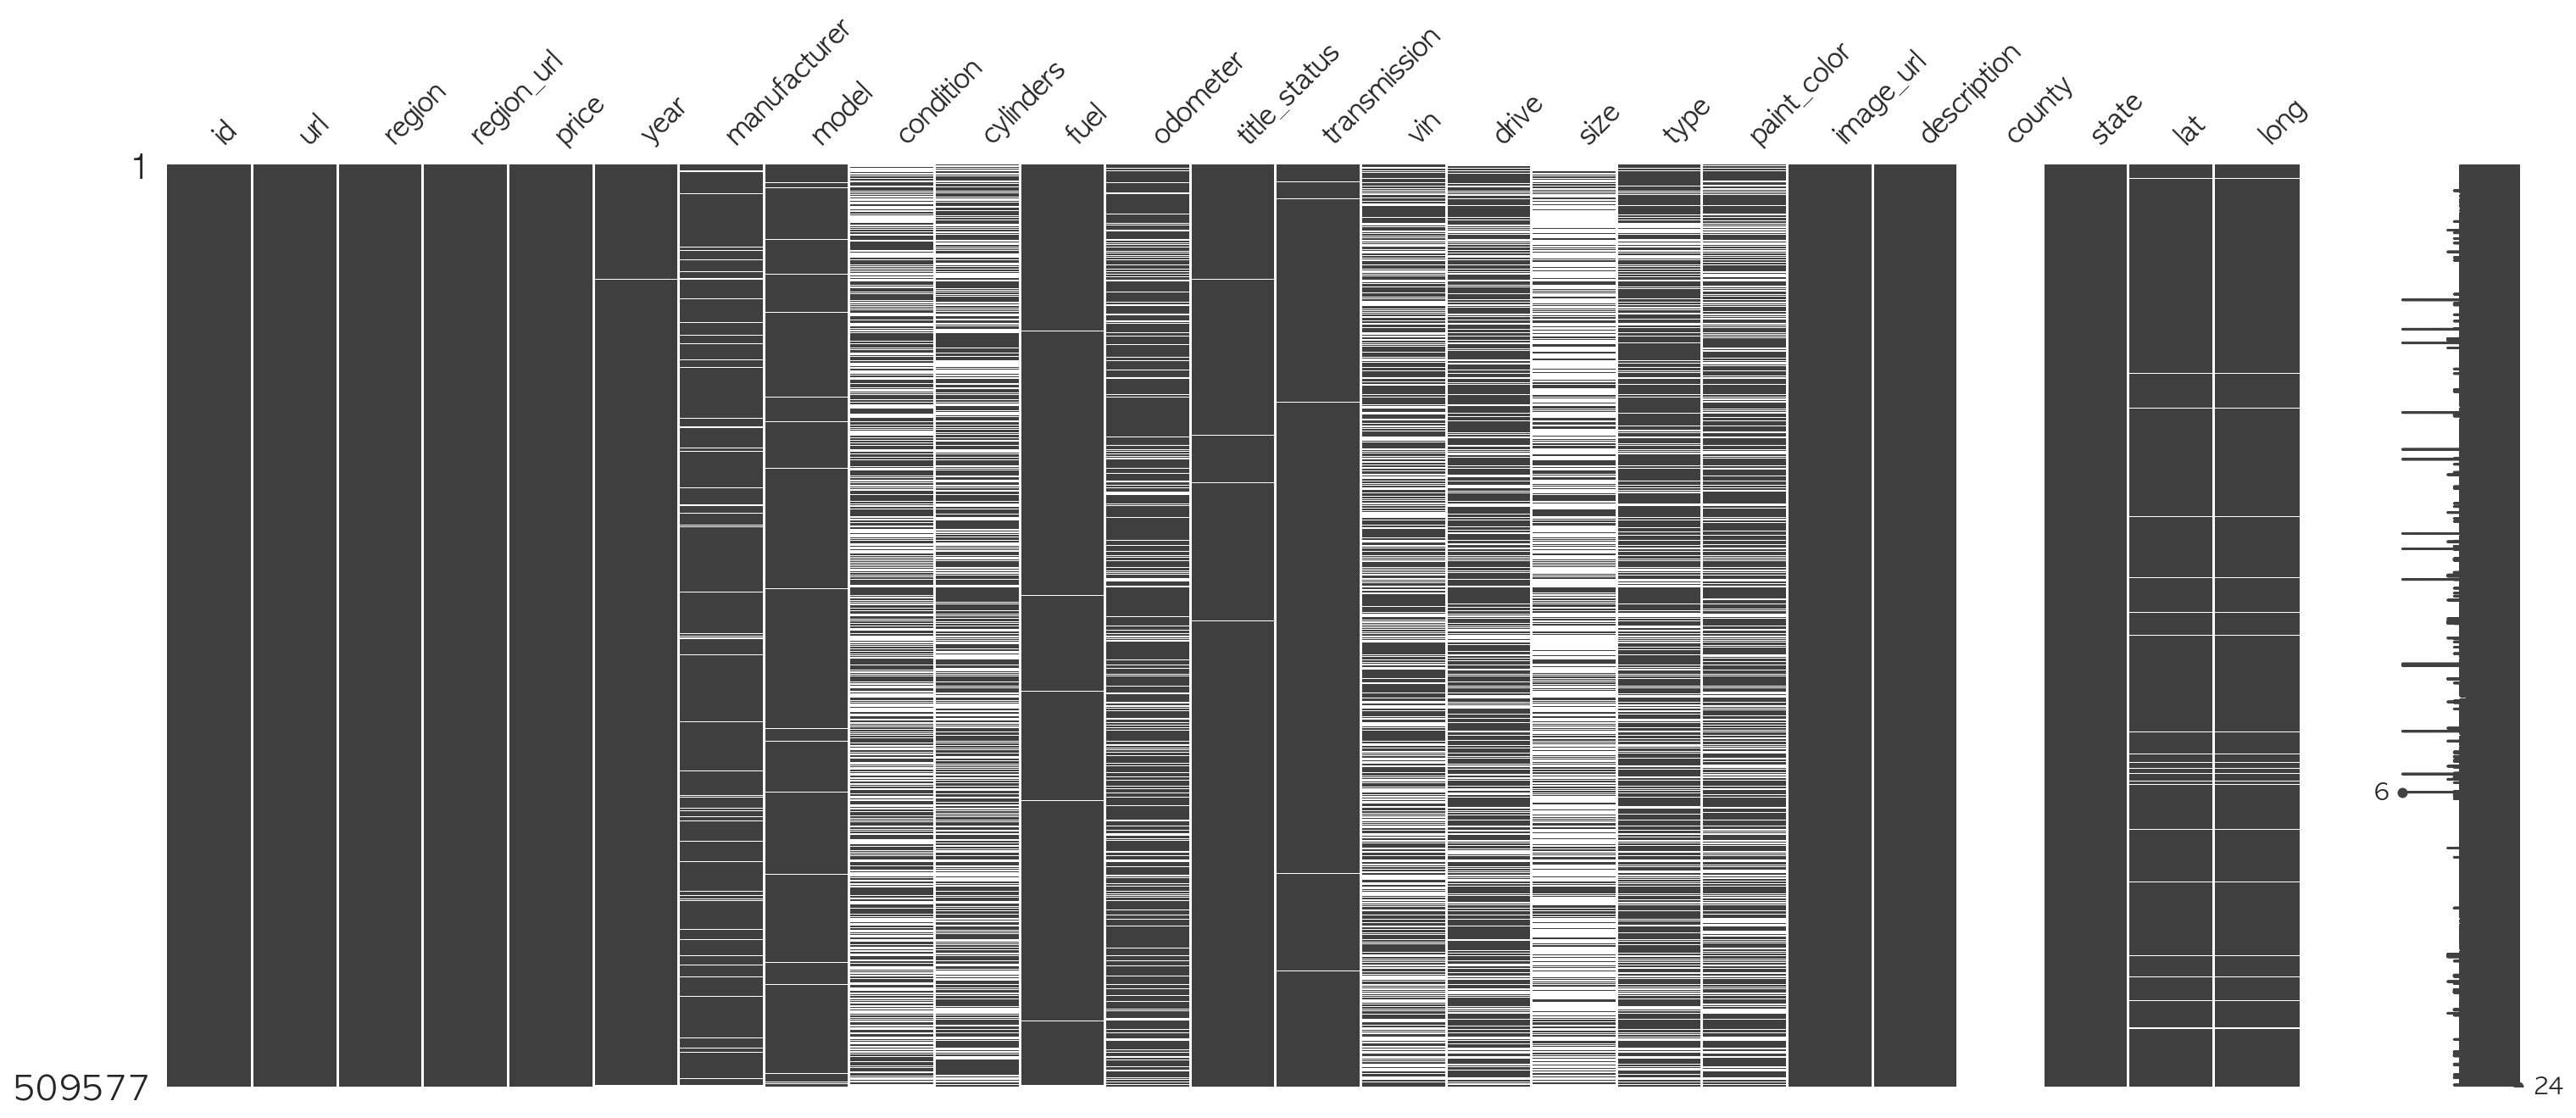

In [3]:
# 결측치 확인
msno.matrix(raw_data)
plt.show()

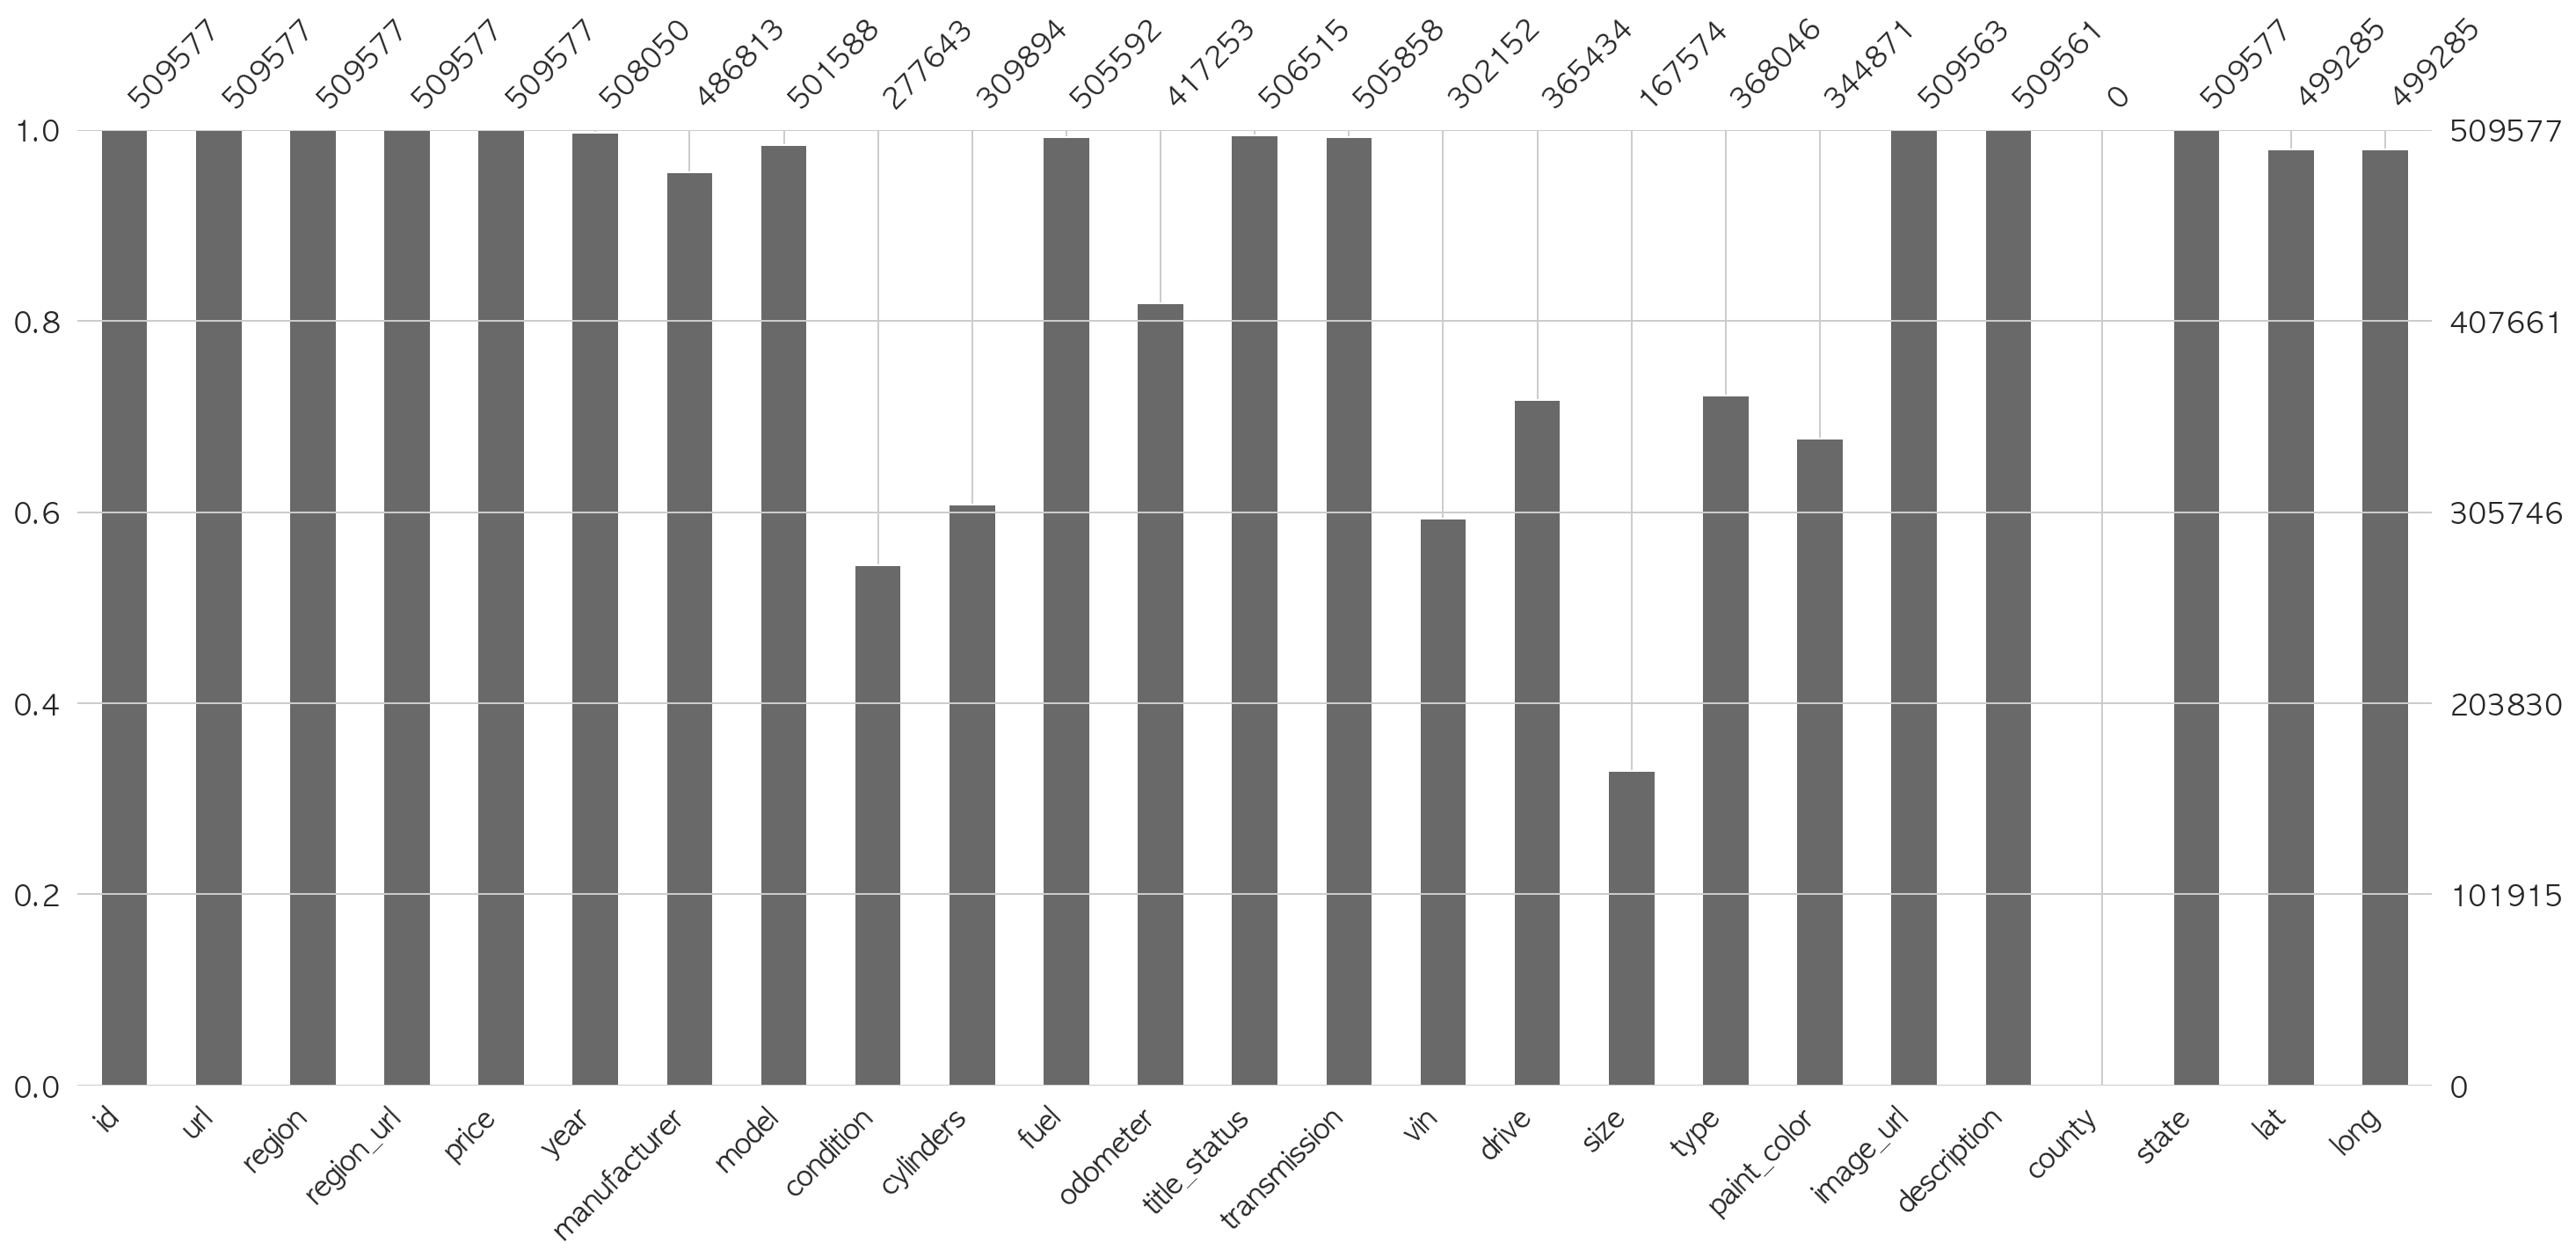

In [4]:
msno.bar(raw_data);

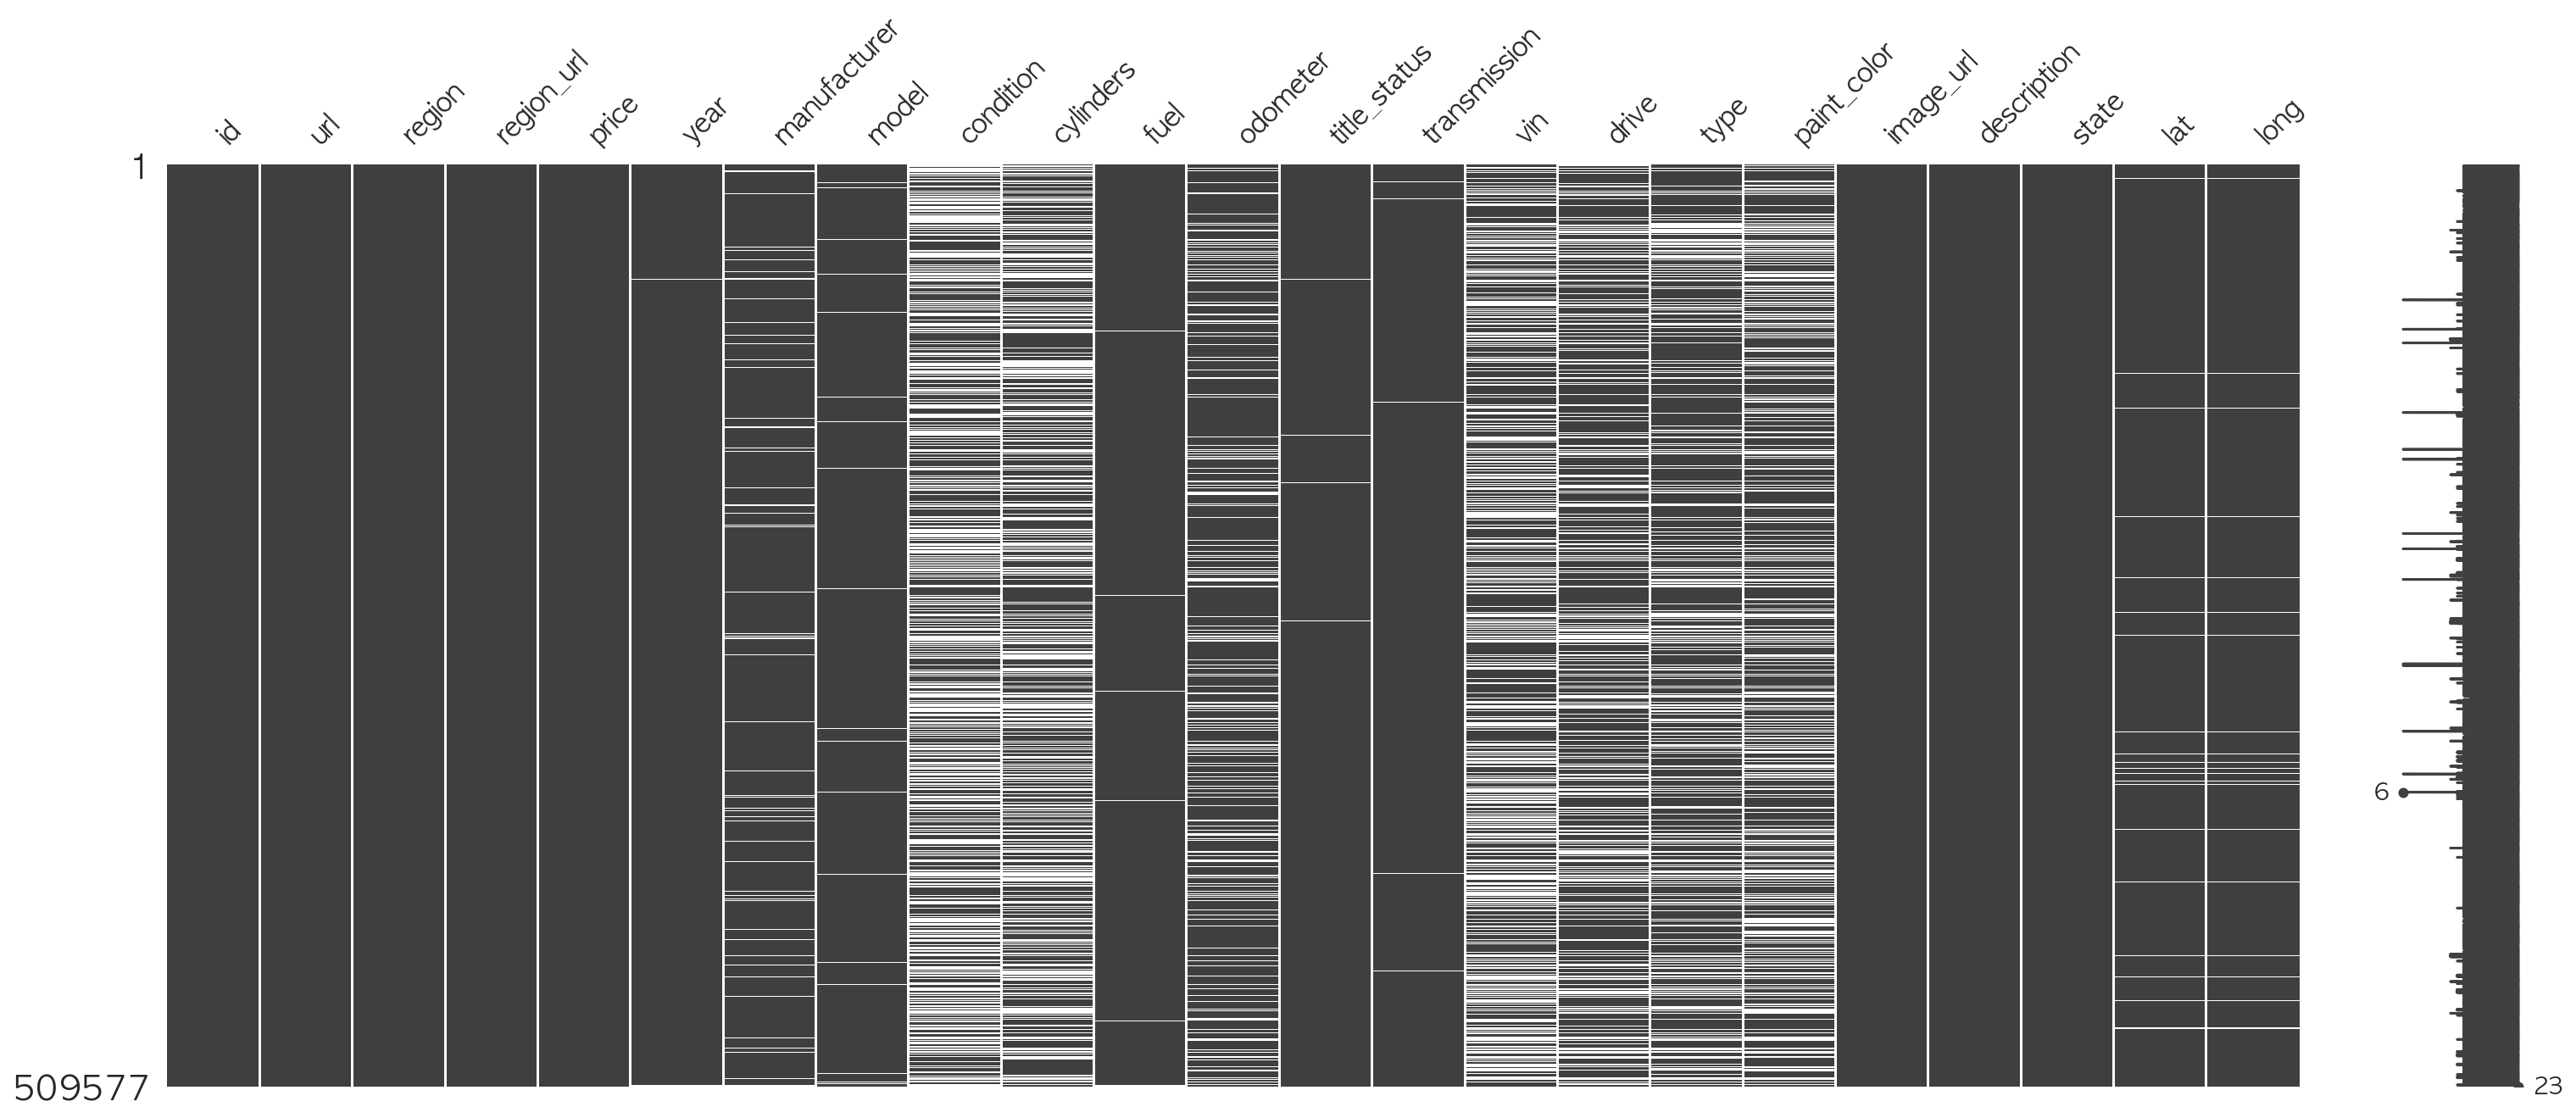

In [5]:
# 데이터가 절반 이상 없는 열 삭제 : size, county
# raw_data = raw_data.dropna(thresh=int(len(raw_data) * 0.5), axis=1)
# msno.matrix(raw_data)
# plt.show()

#### 데이터 컬럼 분류 : 사용유무

1. 분석대상항목

1.1 카테고리 항목 : 1 + 9개
 - id : entry : 중고차 등록 아이디 # 구분자, 실제 모델링에는 사용안함
 - manufacturer : manufacturer of vehicle : 제조사 # 카테고리 독립변수 charater 1
 - cylinders : number of cylinders : 엔진 기통수 # 카테고리 독립변수 charater 2
 - fuel : fuel type 연료타입 # 카테고리 독립변수 charater 3
 - title_status : title status of vehicle 차량 상태 # 카테고리 독립변수 charater 4
 - transmission : transmission of vehicle 미션 # 카테고리 독립변수 character 5
 - drive : type of drive 4wd: 33%, 2wd(fwd,rwd): 38%, null: 28% : 구동방식 # 카테고리 독립변수 character 6
 - type : generic type of vehicle 차량 타입 # 카테고리 독립변수 character 7
 - paint_color : color of vehicle, null: 32%, white: 18%, other: 50% : 차량 색상 # 카테고리 독립변수 character 8
 - state : state of listing : 주 명 # 카테고리 독립변수 character 9
 
1.2 실수 항목 : 총 3개
 - price : entry price : 중고차 가격 # 종속변수 1
 - year : entry year : 중고차 등록 연도 # 실수형 독립변수 numeric 1
 - odometer : miles traveled by vehicle 총주행거리 # 실수형 독립변수 numeric 2


2. 제외항목 : 총 12개
- url : listing : 중고차 등록 URL # 사용안함 1
- region : craigslist region : 중고차 지역 # 사용안함 charater 2
- region_url : region URL : 중고차 지역 URL # 사용안함 3
- model : model of vehicle : 차량 모델명 # 사용안함 4
- condition : condition of vehicle : 차량 상태 # 사용안함 charater 5
- size : size of vehicle, null: 67%, full-size: 18%, other: 15% : 차량크기 # 사용안함 character 6
- vin : vehicle identification number 차대번호 # 사용안함 7
- image_url : image URL, 349468 unique values : 중고차 사진 URL # 사용안함 8
- description : listed description of vehicle : 중고차 상태 설명 # 사용안함 9
- county : useless column left in by mistake : 실수로 올린 필요없는 컬럼 # 사용안함 10
- lat : latitude of listing : 위도 numeric 11
- long : longitude of listing : 경도 numeric 12

In [27]:
raw_data.drop(['url', 'region', 'region_url', 'model', 'condition', 'vin', 'size', 'image_url', 'description', 'county', 'lat', 'long'], axis=1, inplace=True)
raw_data

,id,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,7034441763,17899,2012.00,volkswagen,4 cylinders,gas,63500.00,clean,manual,4wd,hatchback,black,ut
2,7034440588,46463,2015.00,gmc,NaN,gas,7554.00,clean,automatic,4wd,NaN,white,ut
4,7034406932,49999,2018.00,ford,NaN,diesel,70150.00,clean,automatic,4wd,pickup,white,ut
5,7034406582,13999,2009.00,ram,NaN,gas,120057.00,clean,automatic,4wd,pickup,silver,ut
6,7034405619,34500,2017.00,ford,NaN,diesel,95484.00,clean,automatic,4wd,pickup,white,ut
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,7034554007,15476,2012.00,nissan,6 cylinders,gas,103135.00,clean,automatic,4wd,SUV,NaN,ut
509573,7034538385,9881,2008.00,bmw,6 cylinders,gas,108277.00,clean,automatic,rwd,convertible,NaN,ut
509574,7034523643,24895,2019.00,jeep,4 cylinders,gas,6973.00,clean,automatic,4wd,SUV,white,ut
509575,7034458858,32500,2017.00,NaN,6 cylinders,gas,37520.00,clean,automatic,NaN,NaN,red,ut


#### 제외항목 데이터 세부내용

##### 제외 컬럼별 중복값 항목 수

In [586]:
raw_data.columns

Index(['id', 'price', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [590]:
for i in raw_data.columns:
    print(i)
len(i), type(i)

id
price
year
manufacturer
cylinders
fuel
odometer
title_status
transmission
drive
type
paint_color
state


(5, str)

In [51]:
# id : 509577개
# raw_data['id'].value_counts()
len(raw_data['id'].unique())

509577

In [49]:
# url : 509577개
#raw_data['url'].value_counts()
len(raw_data['url'].unique())

509577

In [47]:
# region_url : 413개
# raw_data['region_url'].value_counts()
len(raw_data['region_url'].unique())

413

In [45]:
# model : 35853개
# raw_data['model'].value_counts()
len(raw_data['model'].unique())

35853

In [55]:
# vin : 180145개
# raw_data['vin'].unique()
raw_data['vin'].value_counts()

WDC0G4JB4HF164180    114
Email for VIN         98
WDDZF4JB6KA584632     88
199 DOWN              70
CALL 203 231 1817     59
                    ... 
2C3CDZBT1HH639853      1
WDDKK5KF3EF272585      1
WMWMF33519TW73462      1
1C6RR7GT3FS764256      1
2C3CDXBG6HH627558      1
Name: vin, Length: 180145, dtype: int64

In [58]:
# image_url : 349468개
# raw_data['image_url'].unique()
raw_data['image_url'].value_counts()

https://images.craigslist.org/00i0i_ChcqziILO2_600x450.jpg     167
https://images.craigslist.org/00404_6IsdW1FYvyJ_600x450.jpg    108
https://images.craigslist.org/00j0j_gg93xlqFjZa_600x450.jpg     96
https://images.craigslist.org/00c0c_hHuL9bNLUgi_600x450.jpg     90
https://images.craigslist.org/00i0i_iWh5LDH5pNT_600x450.jpg     80
                                                              ... 
https://images.craigslist.org/00909_4BLLEznZi9c_600x450.jpg      1
https://images.craigslist.org/01212_3dRvcPpSl46_600x450.jpg      1
https://images.craigslist.org/00B0B_itzhMJE4bVN_600x450.jpg      1
https://images.craigslist.org/00i0i_4Acsed5QHqS_600x450.jpg      1
https://images.craigslist.org/00q0q_eBvAhuKcBsK_600x450.jpg      1
Name: image_url, Length: 349468, dtype: int64

In [60]:
# description : 427803개
# raw_data['description'].unique()
raw_data['description'].value_counts()

CLEAN TITLE NO ACCEDINTS  3 YEARS WARRANTY   DOWN PAYMENT STARTS AS LOW AS $500   BUY HERE PAY HERE   IN HOUSE FINANCE  PAYMENTS AS LOW AS $69 A WEEK  Contact Stan FOR AN APPOINTMENT AND TEST DRIVE  (646*288*5793)  WE WORK WITH ALL TYPES OF INCOME. W2, SSI, DISABILITY, CHILD SUPPORT, COMPENSATION, UNEMPLOYMENT, CASH INCOME ETC.  ALL YOU NEED TO DO IS to PROOF your INCOME WITH YOUR MOST RECENT PAY STUB & YOUR LAST 2 RECENT BANK STATEMENTS OR AWARD LETTERS.  COME IN TODAY FOR A TEST DRIVE  CONTACT ME FOR FURTHER DETAILS!  Contact Stan FOR MORE INFO (646*288*5793)                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [61]:
# county: nan
raw_data['county'].unique()

array([nan])

In [63]:
# lat : 51488개
# raw_data['lat'].unique()
raw_data['lat'].value_counts()

43.18    2339
47.66    2146
40.47    2077
46.23    2057
33.79    1814
         ... 
39.15       1
33.53       1
33.97       1
40.85       1
27.32       1
Name: lat, Length: 51488, dtype: int64

In [65]:
# long : 51467개
# raw_data['long'].unique()
raw_data['long'].value_counts()

-84.11     2339
-117.24    2146
-74.28     2077
-119.13    2057
-84.45     1813
           ... 
-149.87       1
-85.35        1
-87.22        1
-121.55       1
-78.96        1
Name: long, Length: 51467, dtype: int64

#### 분석대상 항목 세부내용

##### 종속변수 price 분석

In [5]:
# describe()
raw_data['price'].describe()

count       509577.00
mean         54796.84
std        9575025.12
min              0.00
25%           3995.00
50%           9377.00
75%          17955.00
max     3600028900.00
Name: price, dtype: float64

In [6]:
# 결측치 확인
raw_data['price'].notnull().sum()

509577

In [7]:
# price : 총 509577개
# raw_data['price'].unique()
# raw_data['price'].value_counts()
raw_data['price'].describe()

count       509577.00
mean         54796.84
std        9575025.12
min              0.00
25%           3995.00
50%           9377.00
75%          17955.00
max     3600028900.00
Name: price, dtype: float64

###### price = $0 인값 확인 및 제거

In [3]:
# 1. price = 0 인 데이터 수 : 43579개
price_0 = raw_data[raw_data['price'] == 0].index
len(price_0)

43579

In [4]:
# price = 0인 데이터 제거 후 갯수: 465998개
raw_data.drop(price_0, inplace=True)

In [5]:
len(raw_data['price'])

465998

###### price $100 이하인 값 확인 및 제거

- $100 이하인 값 제거의 정량적 자료 확인 및 제시하기

In [6]:
# price < 100 인 데이터 수 : 4268개
price_under_100 = raw_data[raw_data['price'] < 100].index
price_under_100

Int64Index([   481,    636,   1314,   1373,   1493,   1494,   1534,   1898,
              2052,   2075,
            ...
            506729, 506734, 506799, 506947, 507118, 507237, 507609, 507679,
            508026, 509134],
           dtype='int64', length=4268)

In [7]:
# price $100 이하 값 제거 후 데이터 수 : 461730개
raw_data.drop(price_under_100, inplace=True)

In [8]:
len(raw_data['price'])

461730

- $100만 이상인 값 제거

In [9]:
# price $100만 이상의 갯수 : 72개
price_over_100m = raw_data[raw_data['price'] >= 1000000].index
len(raw_data[raw_data['price'] >= 1000000])

72

In [10]:
# price $100만 이상 값 제거 : 461658개
raw_data.drop(price_over_100m, inplace=True)

In [11]:
len(raw_data['price'])

461658

###### 연속되는 숫자 제거하기

- 1 ~ 9까지 연속된 숫자 만들기
- price = raw_data[raw_data['price'] == 'iternumber']
- 1 ~ 9까지 동일한 숫자 만들기

In [12]:
# 1 ~ 9까지 중복된 숫자 제거하기 : 2523개
price_duple = raw_data[raw_data['price'].isin([1, 11, 111, 1111, 11111, 111111, 1111111, 11111111, 111111111, 2, 22, 222, 2222, 22222, 222222, 2222222, 22222222, 222222222, 3, 33, 333, 3333, 33333, 333333, 3333333, 33333333, 333333333, 
                                              4, 44, 444, 4444, 44444, 444444, 4444444, 44444444, 44444444, 444444444, 5, 55, 555, 5555, 55555, 555555, 5555555, 55555555, 555555555, 
                                              6, 66, 666, 6666, 66666, 666666, 6666666, 66666666, 666666666, 7, 77, 777, 7777, 77777, 777777, 7777777, 77777777, 777777777, 
                                              8, 88, 888, 8888, 88888, 888888, 8888888, 88888888, 888888888, 9, 99, 999, 9999, 99999, 9999999, 99999999, 99999999, 999999999])].index
# len(raw_data[~price_duple])
len(price_duple)

2523

In [13]:
# price 중복된 값 제거 : 459135개
raw_data.drop(price_duple, inplace=True)
len(raw_data['price'])

459135

In [14]:
# 1 ~ 9까지 연속된 숫자 제거하기 : 개
price_iter = raw_data[raw_data['price'].isin([1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890, 
                                             23, 234, 2345, 23456, 234567, 2345678, 23456789, 234567890, 
                                             34, 345, 3456, 34567, 345678, 3456789, 34567890, 
                                             45, 456, 4567, 45678, 456789, 4567890, 
                                             56, 567, 5678, 56789, 567890, 
                                             67, 678, 6789, 67890, 
                                             78, 789, 7890, 
                                             89, 890, 
                                             90, 
                                             987, 9876, 98765, 987654, 9876543, 98765432, 987654321, 9876543210])].index
# len(raw_data[~price_iter])
len(price_iter)

190

In [15]:
# price 연속된 값 제거 : 458945개
raw_data.drop(price_iter, inplace=True)
len(raw_data['price'])

458945

###### 

In [53]:
# 연속되는 숫자
a = 0, 1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789
b = (2, 23, 234, 2345, 23456, 234567, 2345678, 23456789, 234567890)
c = (3, 34, 345, 3456, 34567, 345678, 3456789, 34567890)
d = (4, 45, 456, 4567, 45678, 456789, 4567890)
e = (5, 56, 567, 5678, 56789, 567890)
f = (6, 67, 678, 6789, 67890)
g = (7, 78, 789, 7890)
h = (8, 89, 890)
i = (9, 90)
j = (0)
k = (1)
l = (22)
m = (333)
n = [4444]
o = [55555]
p = (666666)
q = (7777777)
r = (88888888)
s = (999999999)

In [463]:
a

(0, 1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
75140,7033880767,https://jonesboro.craigslist.org/ctd/d/jonesbo...,jonesboro,https://jonesboro.craigslist.org,333,2017.00,ford,edge titanium,good,NaN,gas,59209.00,clean,automatic,2FMPK3K96HBB38315,fwd,NaN,other,red,https://images.craigslist.org/00F0F_hRoogeuQcs...,Why Buy From Honda of Jonesboro?Honda is truly...,nan,ar,35.81,-90.67
124822,7041965436,https://stockton.craigslist.org/ctd/d/pittsbur...,stockton,https://stockton.craigslist.org,4444,2005.00,pontiac,montana sv6,NaN,6 cylinders,gas,128035.00,clean,automatic,1GMDV33L05D170476,fwd,NaN,other,silver,https://images.craigslist.org/00k0k_GHfdLfX4o4...,"2005 Pontiac Montana SV6 Minivan 4DPrice: $4,4...",nan,ca,38.00,-121.92
189095,7042622291,https://treasure.craigslist.org/cto/d/boca-rat...,treasure coast,https://treasure.craigslist.org,4444,2001.00,mercedes-benz,slk,excellent,4 cylinders,gas,nan,clean,automatic,NaN,NaN,compact,convertible,white,https://images.craigslist.org/01414_3B1Ttykol5...,"Pros: Original Owner selling her Baby, 2001 Wh...",nan,fl,26.41,-80.09
200750,7049602922,https://boise.craigslist.org/ctd/d/nampa-2019-...,boise,https://boise.craigslist.org,55555,2019.00,gmc,sierra 1500 4wd crew cab denali,NaN,NaN,gas,1619.00,clean,NaN,3GTU9FED0KG266445,4wd,NaN,NaN,black,https://images.craigslist.org/00T0T_agNpliXAN1...,2019 GMC Sierra 1500 4WD Crew Cab Denali Pete...,nan,id,43.60,-116.51
210497,7047537776,https://bn.craigslist.org/ctd/d/bloomington-20...,bloomington-normal,https://bn.craigslist.org,4444,2004.00,jeep,liberty,excellent,NaN,gas,161718.00,clean,automatic,1J4GL48KX4W114670,4wd,NaN,SUV,silver,https://images.craigslist.org/00n0n_avzt6c8amm...,2004 Jeep Liberty Sport 4dr 4WD SUV SUV Bett...,nan,il,40.47,-88.98
210523,7045327132,https://bn.craigslist.org/ctd/d/bloomington-20...,bloomington-normal,https://bn.craigslist.org,4444,2005.00,hyundai,tucson,excellent,NaN,gas,155299.00,clean,automatic,KM8JN12DX5U107354,fwd,NaN,SUV,blue,https://images.craigslist.org/00d0d_iiCFBDpRyX...,2005 Hyundai Tucson GLS 4dr SUV SUV Better P...,nan,il,40.47,-88.98
210561,7044025294,https://bn.craigslist.org/ctd/d/bloomington-20...,bloomington-normal,https://bn.craigslist.org,4444,2004.00,jeep,liberty,excellent,NaN,gas,110223.00,clean,automatic,1J4GL48K34W304665,4wd,NaN,SUV,NaN,https://images.craigslist.org/00d0d_fBaztF5E0D...,2004 Jeep Liberty Sport 4dr 4WD SUV SUV Bett...,nan,il,40.47,-88.98
210701,7037263054,https://bn.craigslist.org/ctd/d/bloomington-20...,bloomington-normal,https://bn.craigslist.org,4444,2007.00,kia,sorento,excellent,NaN,gas,141696.00,clean,automatic,KNDJD736675730736,rwd,NaN,SUV,NaN,https://images.craigslist.org/00r0r_jHxr25DZFh...,2007 Kia Sorento LX 4dr SUV SUV Better Price...,nan,il,40.47,-88.98
210757,7033546112,https://bn.craigslist.org/ctd/d/bloomington-20...,bloomington-normal,https://bn.craigslist.org,4444,2008.00,buick,lucerne,excellent,NaN,gas,160551.00,clean,automatic,1G4HD57278U115366,fwd,NaN,sedan,NaN,https://images.craigslist.org/00K0K_fr6e6PAmV8...,2008 Buick Lucerne CXL 4dr Sedan Sedan Bette...,nan,il,40.47,-88.98
214929,7039662360,https://peoria.craigslist.org/ctd/d/bloomingto...,peoria,https://peoria.craigslist.org,4444,2007.00,lincoln,mkx,excellent,NaN,gas,208763.00,clean,automatic,2LMDU88C77BJ24343,4wd,NaN,SUV,silver,https://images.craigslist.org/00505_kEuksCpzsq...,2007 Lincoln MKX Base AWD 4dr SUV SUV Better...,nan,il,40.47,-88.98


In [476]:
price_iter = raw_data[(raw_data['price'] == 4444)]# | (raw_data[(raw_data['price'] == 1234)]) 
len(price_iter)

20

In [478]:
price_iter = raw_data[(raw_data['price'] == 'n')]# | (raw_data[(raw_data['price'] == 1234)]) 
len(price_iter)

0

In [335]:
for a in range(1, 10):
    for b in range(1, a+1):
        print(b, end=' ')
    print()

1 
1 2 
1 2 3 
1 2 3 4 
1 2 3 4 5 
1 2 3 4 5 6 
1 2 3 4 5 6 7 
1 2 3 4 5 6 7 8 
1 2 3 4 5 6 7 8 9 


In [337]:
for i in range(1, 10):
    for j in range(1, i+1):
        print(i, end=' ')
    print()

1 
2 2 
3 3 3 
4 4 4 4 
5 5 5 5 5 
6 6 6 6 6 6 
7 7 7 7 7 7 7 
8 8 8 8 8 8 8 8 
9 9 9 9 9 9 9 9 9 


In [354]:
a = []
for i in range(1, 10):
    for j in range(1, i + 1):
        print(j, end=' ')
    print()

1 
1 2 
1 2 3 
1 2 3 4 
1 2 3 4 5 
1 2 3 4 5 6 
1 2 3 4 5 6 7 
1 2 3 4 5 6 7 8 
1 2 3 4 5 6 7 8 9 


In [375]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]
b = []
for i in a:
    line = []
    for j in range(1, i+1):
        line.append(i)
    b.append(line)
print(b)

[[1, 2, 1], [1, 3, 2, 2], [1, 4, 3, 3, 3], [1, 5, 4, 4, 4, 4], [1, 6, 5, 5, 5, 5, 5], [1, 7, 6, 6, 6, 6, 6, 6], [1, 8, 7, 7, 7, 7, 7, 7, 7], [1, 9, 8, 8, 8, 8, 8, 8, 8, 8], [1, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9]]


In [380]:
k = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
l = []
for i in k:
    line = []
    for j in range(i+1):
        line.append(i)
    l.append(line)
print(l)

[[0], [1, 1], [2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4, 4], [5, 5, 5, 5, 5, 5], [6, 6, 6, 6, 6, 6, 6], [7, 7, 7, 7, 7, 7, 7, 7], [8, 8, 8, 8, 8, 8, 8, 8, 8], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]


###### 가격 기타 분석 내용

In [124]:
# price $0 제외 후 상위 3350개
raw_data[raw_data['price'] != 0].sort_values('price')[:3350]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
156028,7041293944,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,1,2019.00,ford,f-150,excellent,10 cylinders,gas,17976.00,clean,other,1FTEW1E55KFA66770,4wd,full-size,truck,grey,https://images.craigslist.org/00r0r_6vpl87kL94...,CREDIT AMNESTY!Â PAYMENTS AS LOW AS $99 A MON...,nan,fl,28.47,-81.40
160463,7041496437,https://fortmyers.craigslist.org/col/ctd/d/orl...,ft myers / SW florida,https://fortmyers.craigslist.org,1,2016.00,rover,discovery sport,excellent,4 cylinders,gas,41372.00,clean,automatic,SALCR2BG7GH580909,4wd,full-size,SUV,silver,https://images.craigslist.org/00505_c5yPFmlugG...,CREDIT AMNESTY!Â PAYMENTS AS LOW AS $99 A MON...,nan,fl,28.47,-81.40
160462,7041496583,https://fortmyers.craigslist.org/col/ctd/d/orl...,ft myers / SW florida,https://fortmyers.craigslist.org,1,2016.00,infiniti,qx60,excellent,6 cylinders,gas,37630.00,clean,automatic,5N1AL0MN8GC510201,4wd,full-size,SUV,white,https://images.craigslist.org/00909_7VbzPbOVo5...,CREDIT AMNESTY!Â PAYMENTS AS LOW AS $99 A MON...,nan,fl,28.47,-81.40
160461,7041496577,https://fortmyers.craigslist.org/col/ctd/d/orl...,ft myers / SW florida,https://fortmyers.craigslist.org,1,2016.00,chevrolet,corvette,excellent,10 cylinders,gas,19140.00,clean,other,1G1YH3D79G5117635,4wd,mid-size,convertible,black,https://images.craigslist.org/00I0I_ctsMoM0vmD...,CREDIT AMNESTY!Â PAYMENTS AS LOW AS $99 A MON...,nan,fl,28.47,-81.40
160459,7041496524,https://fortmyers.craigslist.org/col/ctd/d/orl...,ft myers / SW florida,https://fortmyers.craigslist.org,1,2017.00,ford,expedition,excellent,8 cylinders,gas,61387.00,clean,other,1FMJU1KT4HEA07758,4wd,full-size,SUV,silver,https://images.craigslist.org/00o0o_81eM7q9kHc...,CREDIT AMNESTY!Â PAYMENTS AS LOW AS $99 A MON...,nan,fl,28.47,-81.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367969,7044373268,https://buffalo.craigslist.org/cto/d/lockport-...,buffalo,https://buffalo.craigslist.org,19,2017.00,honda,civic si,excellent,4 cylinders,gas,38300.00,lien,manual,2HGFC1E5XHH707305,fwd,NaN,sedan,blue,https://images.craigslist.org/00p0p_cg14bg6OBn...,"Six speed manual, heated seats, push button st...",nan,ny,43.16,-78.69
199598,7048088214,https://honolulu.craigslist.org/big/cto/d/keaa...,hawaii,https://honolulu.craigslist.org,19,2016.00,toyota,tacoma prerunner,NaN,NaN,gas,nan,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00b0b_jrO22KaKNE...,Toyota Tacoma auto ac 4cyl prerunner runs and ...,nan,hi,19.59,-154.99
477299,7047221707,https://tricities.craigslist.org/cto/d/johnson...,tri-cities,https://tricities.craigslist.org,19,1934.00,NaN,1934 plymouth,good,6 cylinders,gas,0.00,clean,manual,NaN,rwd,full-size,NaN,black,https://images.craigslist.org/00q0q_aINz3LI4av...,1934 Plymouth 4 Door (suicide) Sedan. 6 cylind...,nan,tn,36.40,-82.45
197408,7050008491,https://honolulu.craigslist.org/big/cto/d/kamu...,hawaii,https://honolulu.craigslist.org,20,1955.00,chevrolet,NaN,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00707_acBgCTG4f5...,Very clean 1955 Chevy 210 post. Original Arizo...,nan,hi,19.98,-155.69


In [157]:
# prirce 높은 순 정렬 
raw_data['price'].sort_values(ascending=False)[:100]
# len(raw_data['price'].sort_values(ascending=False)[:100])

345972    3600028900
264595    3567587328
473874    2521176519
190773    2490531375
353470    1316134912
86485     1234567890
16015     1172420096
73946      999999999
176537     999999999
282099     999999999
496917     831365932
74292      123456789
466220     123456789
183054     123456789
222547     123456789
3509       123456789
379837     123456789
481420     111111111
109402     111111111
359795     100000000
108581     100000000
37720       45000000
137476      36980499
135433      35880499
136896      33880499
496949      30716359
137539      29800499
137228      26900499
137230      26880499
137538      23880499
137803      21880499
137204      18980499
137477      18880499
137231      18880499
135568      18700499
137513      17600499
135907      15990499
135454      15900499
135437      15800499
135482      15550499
390263      12345678
479176      12345678
404433      12345678
367138      12345678
467863      11111111
107627      11111111
145626      11111111
211355      1

In [160]:
# price $69,000 데이터 확인
raw_data[raw_data['price'] == 69000]
# len(raw_data[raw_data['price'] == 69000])

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
51088,7043434977,https://huntsville.craigslist.org/ctd/d/shelby...,huntsville / decatur,https://huntsville.craigslist.org,69000,2018.00,chevrolet,camaro,NaN,8 cylinders,gas,924.00,clean,manual,1G1FJ1R69J0128655,rwd,NaN,coupe,red,https://images.craigslist.org/00b0b_4gpnbKreVz...,2018 Chevrolet_ Camaro_ ZL1 Offer...,nan,al,35.52,-86.44
55300,7046184321,https://bham.craigslist.org/ctd/d/rio-linda-19...,birmingham,https://bham.craigslist.org,69000,1962.00,chevrolet,impala,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00101_iUTV9KySfn...,Hi I have a 1962 Chevy impala convertible drop...,nan,al,38.69,-121.45
56168,7041398634,https://bham.craigslist.org/ctd/d/jasper-2010-...,birmingham,https://bham.craigslist.org,69000,2010.00,gmc,c5500,NaN,NaN,diesel,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00202_drnK6PH7JK...,2010 Mack TD713 Titan Tri-axle Winch Tractor T...,nan,al,34.46,-84.48
68827,7046183789,https://tucson.craigslist.org/ctd/d/rio-linda-...,tucson,https://tucson.craigslist.org,69000,1962.00,chevrolet,impala,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00101_iUTV9KySfn...,Hi I have a 1962 Chevy impala convertible drop...,nan,az,38.69,-121.45
70295,7042839743,https://tucson.craigslist.org/ctd/d/rio-linda-...,tucson,https://tucson.craigslist.org,69000,1958.00,chevrolet,apache,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_1NJs8Do7Xu...,Hi I have a 1958 chevy Apache 3100 short bed s...,nan,az,38.69,-121.45
70372,7048695416,https://yuma.craigslist.org/ctd/d/calexico-bmw...,yuma,https://yuma.craigslist.org,69000,2009.00,bmw,528i,good,6 cylinders,gas,nan,clean,automatic,NaN,rwd,full-size,sedan,black,https://images.craigslist.org/00l0l_7QQZWWjMpq...,Black BMW 528i excellent running conditions. ...,nan,az,32.68,-115.50
75500,7048456881,https://littlerock.craigslist.org/ctd/d/spring...,little rock,https://littlerock.craigslist.org,69000,2015.00,ram,5500,excellent,6 cylinders,diesel,187117.00,clean,automatic,3C7WRMBL4FG647104,rwd,compact,SUV,white,https://images.craigslist.org/00F0F_69JeJUhEcg...,2015 RAM 5500 Stellar Mechanics Service Truck ...,nan,ar,37.18,-93.31
146195,7042840885,https://hartford.craigslist.org/ctd/d/rio-lind...,hartford,https://hartford.craigslist.org,69000,1958.00,NaN,Apache,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_1NJs8Do7Xu...,Hi I have a 1958 chevy Apache 3100 short bed s...,nan,ct,38.69,-121.45
150248,7033187789,https://nwct.craigslist.org/ctd/d/rio-linda-19...,northwest CT,https://nwct.craigslist.org,69000,1968.00,chevrolet,camaro,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00909_6oyYteixKc...,Hi I have a 1968 Pro Touring drop top RS Camar...,nan,ct,38.69,-121.45
155556,7044358158,https://daytona.craigslist.org/cto/d/odessa-19...,daytona beach,https://daytona.craigslist.org,69000,1957.00,chevrolet,corvette,excellent,8 cylinders,gas,150.00,clean,automatic,E57S107339,rwd,NaN,NaN,green,https://images.craigslist.org/00Y0Y_3ukUx0mDdw...,"1957 Corvette with 1984 Corvette chassis, powe...",nan,fl,28.14,-82.59


In [117]:
# price $100만 이상의 갯수 : 46791개
raw_data[raw_data['price'] < 10]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,ford,f-150,excellent,NaN,gas,10.00,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,ford,f-150,excellent,NaN,gas,10.00,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
44,7033844851,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,ford,f-350 super duty,excellent,NaN,diesel,10.00,clean,automatic,1FT8W3BTXGEC69873,4wd,NaN,NaN,black,https://images.craigslist.org/00x0x_9vEFJQlAmM...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
45,7033844817,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,ford,focus,excellent,NaN,gas,10.00,clean,automatic,1FADP3F2XGL361600,fwd,NaN,NaN,NaN,https://images.craigslist.org/00K0K_9O2nmEkIQV...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
77,7033301645,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,0,2014.00,chevrolet,cruze,NaN,4 cylinders,gas,68908.00,clean,automatic,1G1PH5SBXE7233345,fwd,NaN,sedan,NaN,https://images.craigslist.org/00u0u_d4XdKV0OmO...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,nan,ut,39.64,-104.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509524,7035651223,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,ford,f-150,excellent,NaN,gas,10.00,clean,automatic,1FTEW1EG4GKE73625,4wd,NaN,NaN,NaN,https://images.craigslist.org/01313_l62LZ1s0eK...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
509533,7035651259,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,lincoln,mkx,excellent,NaN,gas,10.00,clean,automatic,2LMTJ8LR3GBL46488,4wd,NaN,NaN,NaN,https://images.craigslist.org/00Q0Q_3zD2Tz8r05...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
509552,7034973162,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.00,ford,fusion,excellent,NaN,gas,75.00,clean,automatic,3FA6P0D91GR303951,4wd,NaN,NaN,NaN,https://images.craigslist.org/00w0w_1bfI3poPlL...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
509553,7034973147,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2017.00,ford,mustang,excellent,NaN,gas,10.00,clean,automatic,1FA6P8TH8H5210226,rwd,NaN,NaN,NaN,https://images.craigslist.org/01414_iBPlZNvmYI...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88


In [208]:
# price $0, $150,000 이상인 데이터
len(raw_data.loc[(raw_data['price'] <= 100) & (raw_data['price'] >= 150000), : ])
raw_data.loc[raw_data['price'] == 0 & raw_data['price'] >= 1000000]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0.5, 1.0, 'Price Distribution')

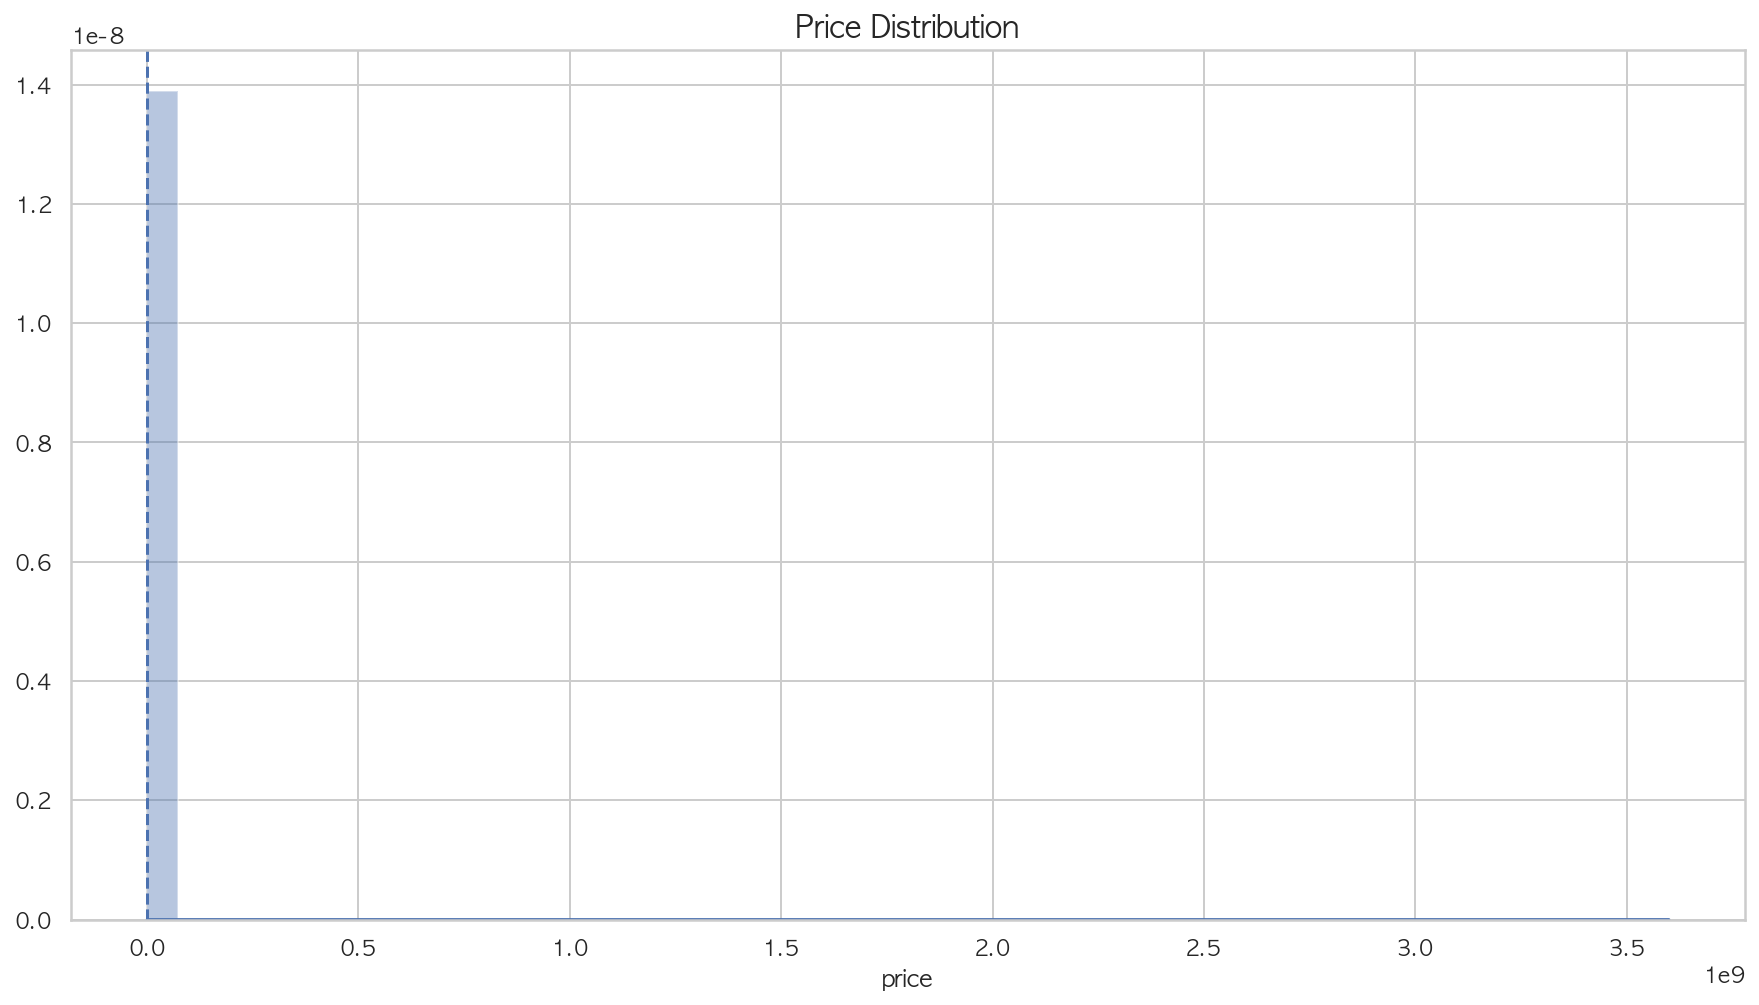

In [93]:
# price under $100 plot
plt.subplots(figsize=(15,8))
price = raw_data[raw_data['price']<100]
sns.distplot(raw_data['price'])
plt.axvline(raw_data['price'].median(), linestyle='dashed')
plt.title('Price Distribution', size=15)

In [109]:
# price under $100 count plot
# plt.figure(figsize=(10, 5))
ax = sns.countplot(x="raw_data[raw_data['price'] < 100]", data=raw_data)
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret input 'raw_data[raw_data['price'] < 100]'

##### 독립변수 분석

###### region 분석

In [21]:
raw_data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.00,volkswagen,golf r,excellent,4 cylinders,gas,63500.00,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,nan,ut,40.74,-111.86
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.00,gmc,sierra 1500,excellent,NaN,gas,7554.00,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,nan,ut,40.59,-111.88
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.00,ford,f-450,NaN,NaN,diesel,70150.00,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,nan,ut,40.37,-104.69
5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.00,ram,NaN,NaN,NaN,gas,120057.00,clean,automatic,1D3HV18P89S777871,4wd,NaN,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",nan,ut,40.37,-104.69
6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.00,ford,f-350,NaN,NaN,diesel,95484.00,clean,automatic,1FT8W3BT2HEE98744,4wd,NaN,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,nan,ut,40.37,-104.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,7034554007,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,15476,2012.00,nissan,xterra,NaN,6 cylinders,gas,103135.00,clean,automatic,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,nan,ut,39.64,-104.96
509573,7034538385,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,9881,2008.00,bmw,3 series 328i,NaN,6 cylinders,gas,108277.00,clean,automatic,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,nan,ut,39.64,-104.96
509574,7034523643,https://saltlakecity.craigslist.org/ctd/d/salm...,salt lake city,https://saltlakecity.craigslist.org,24895,2019.00,jeep,cherokee,NaN,4 cylinders,gas,6973.00,clean,automatic,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,"2019 Jeep Cherokee Latitude Plus -- $24,895 ...",nan,ut,45.16,-113.89
509575,7034458858,https://saltlakecity.craigslist.org/cto/d/ogde...,salt lake city,https://saltlakecity.craigslist.org,32500,2017.00,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,37520.00,clean,automatic,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,2017 Porsche Macan GTS Carmine Red w/ Black ...,nan,ut,41.31,-111.97


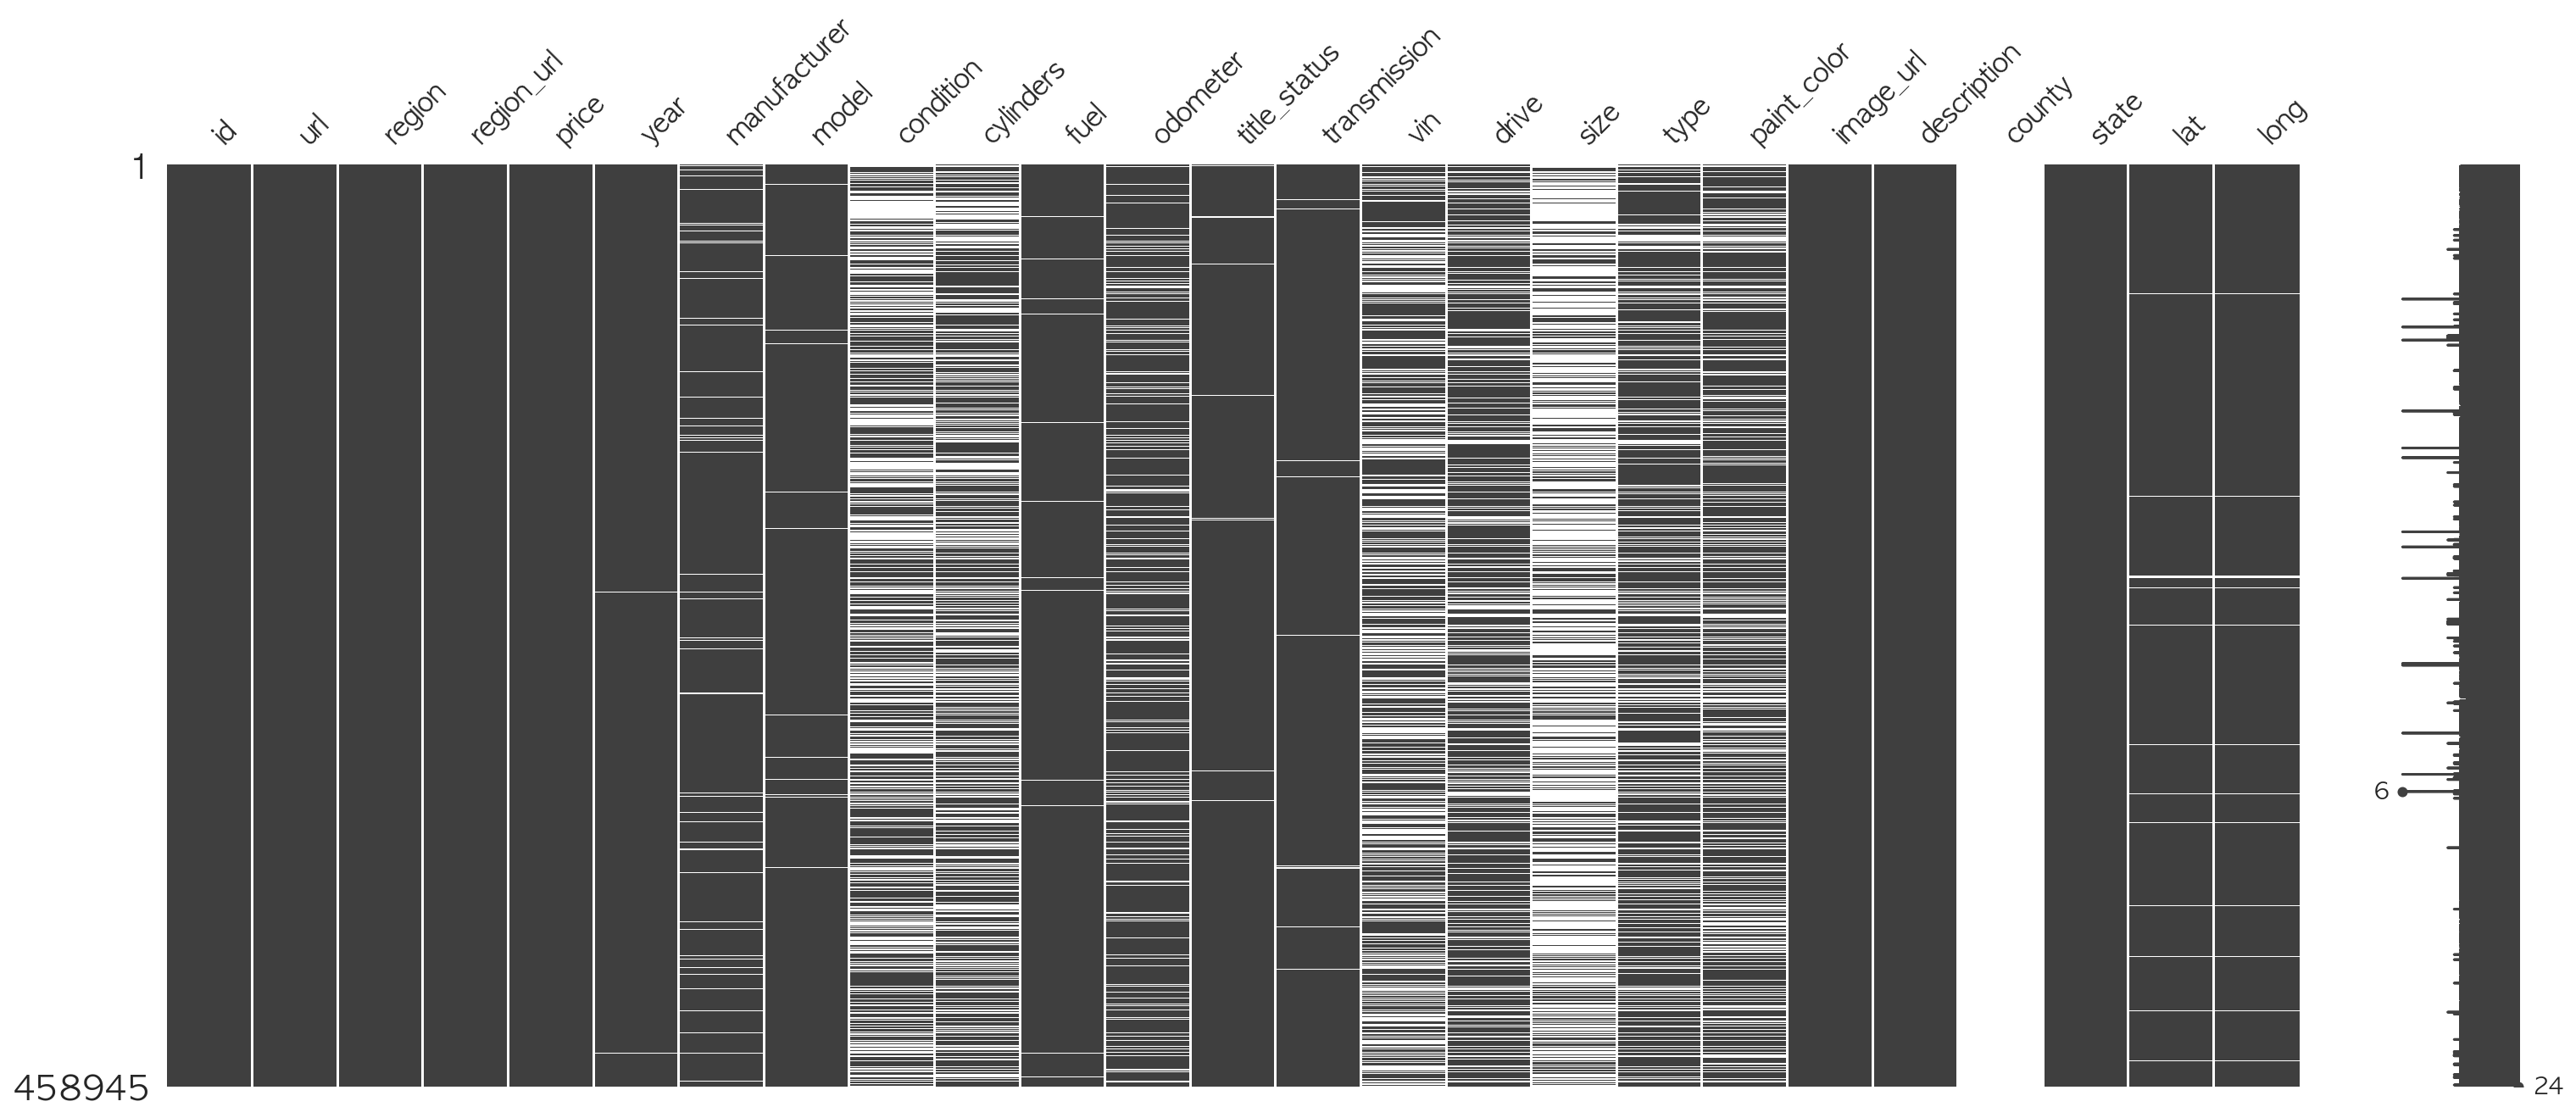

In [22]:
# 결측치 확인
msno.matrix(raw_data)
plt.show()

In [16]:
len(raw_data.isnull())

458945

In [28]:
raw_data_drop_row = raw_data.dropna(axis=0)
raw_data_drop_row

,id,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,7034441763,17899,2012.00,volkswagen,4 cylinders,gas,63500.00,clean,manual,4wd,hatchback,black,ut
24,7034278551,4600,2008.00,honda,4 cylinders,gas,110982.00,clean,automatic,fwd,sedan,grey,ut
27,7034206084,26950,2015.00,ram,6 cylinders,diesel,68013.00,rebuilt,automatic,4wd,truck,white,ut
28,7034195717,39995,2016.00,chevrolet,8 cylinders,gas,23773.00,clean,automatic,4wd,pickup,black,ut
32,7034118739,37995,2017.00,ram,8 cylinders,gas,21125.00,clean,automatic,4wd,pickup,white,ut
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509548,7035257184,6500,2008.00,chevrolet,8 cylinders,gas,195000.00,clean,automatic,rwd,van,white,ut
509551,7035110469,7500,2014.00,nissan,4 cylinders,gas,99990.00,clean,manual,fwd,hatchback,white,ut
509555,7034929999,32000,2018.00,gmc,6 cylinders,gas,39457.00,clean,automatic,4wd,pickup,black,ut
509564,7034695131,25900,2016.00,nissan,6 cylinders,gas,44089.00,clean,automatic,4wd,SUV,grey,ut


In [29]:
len(raw_data_drop_row)

171416

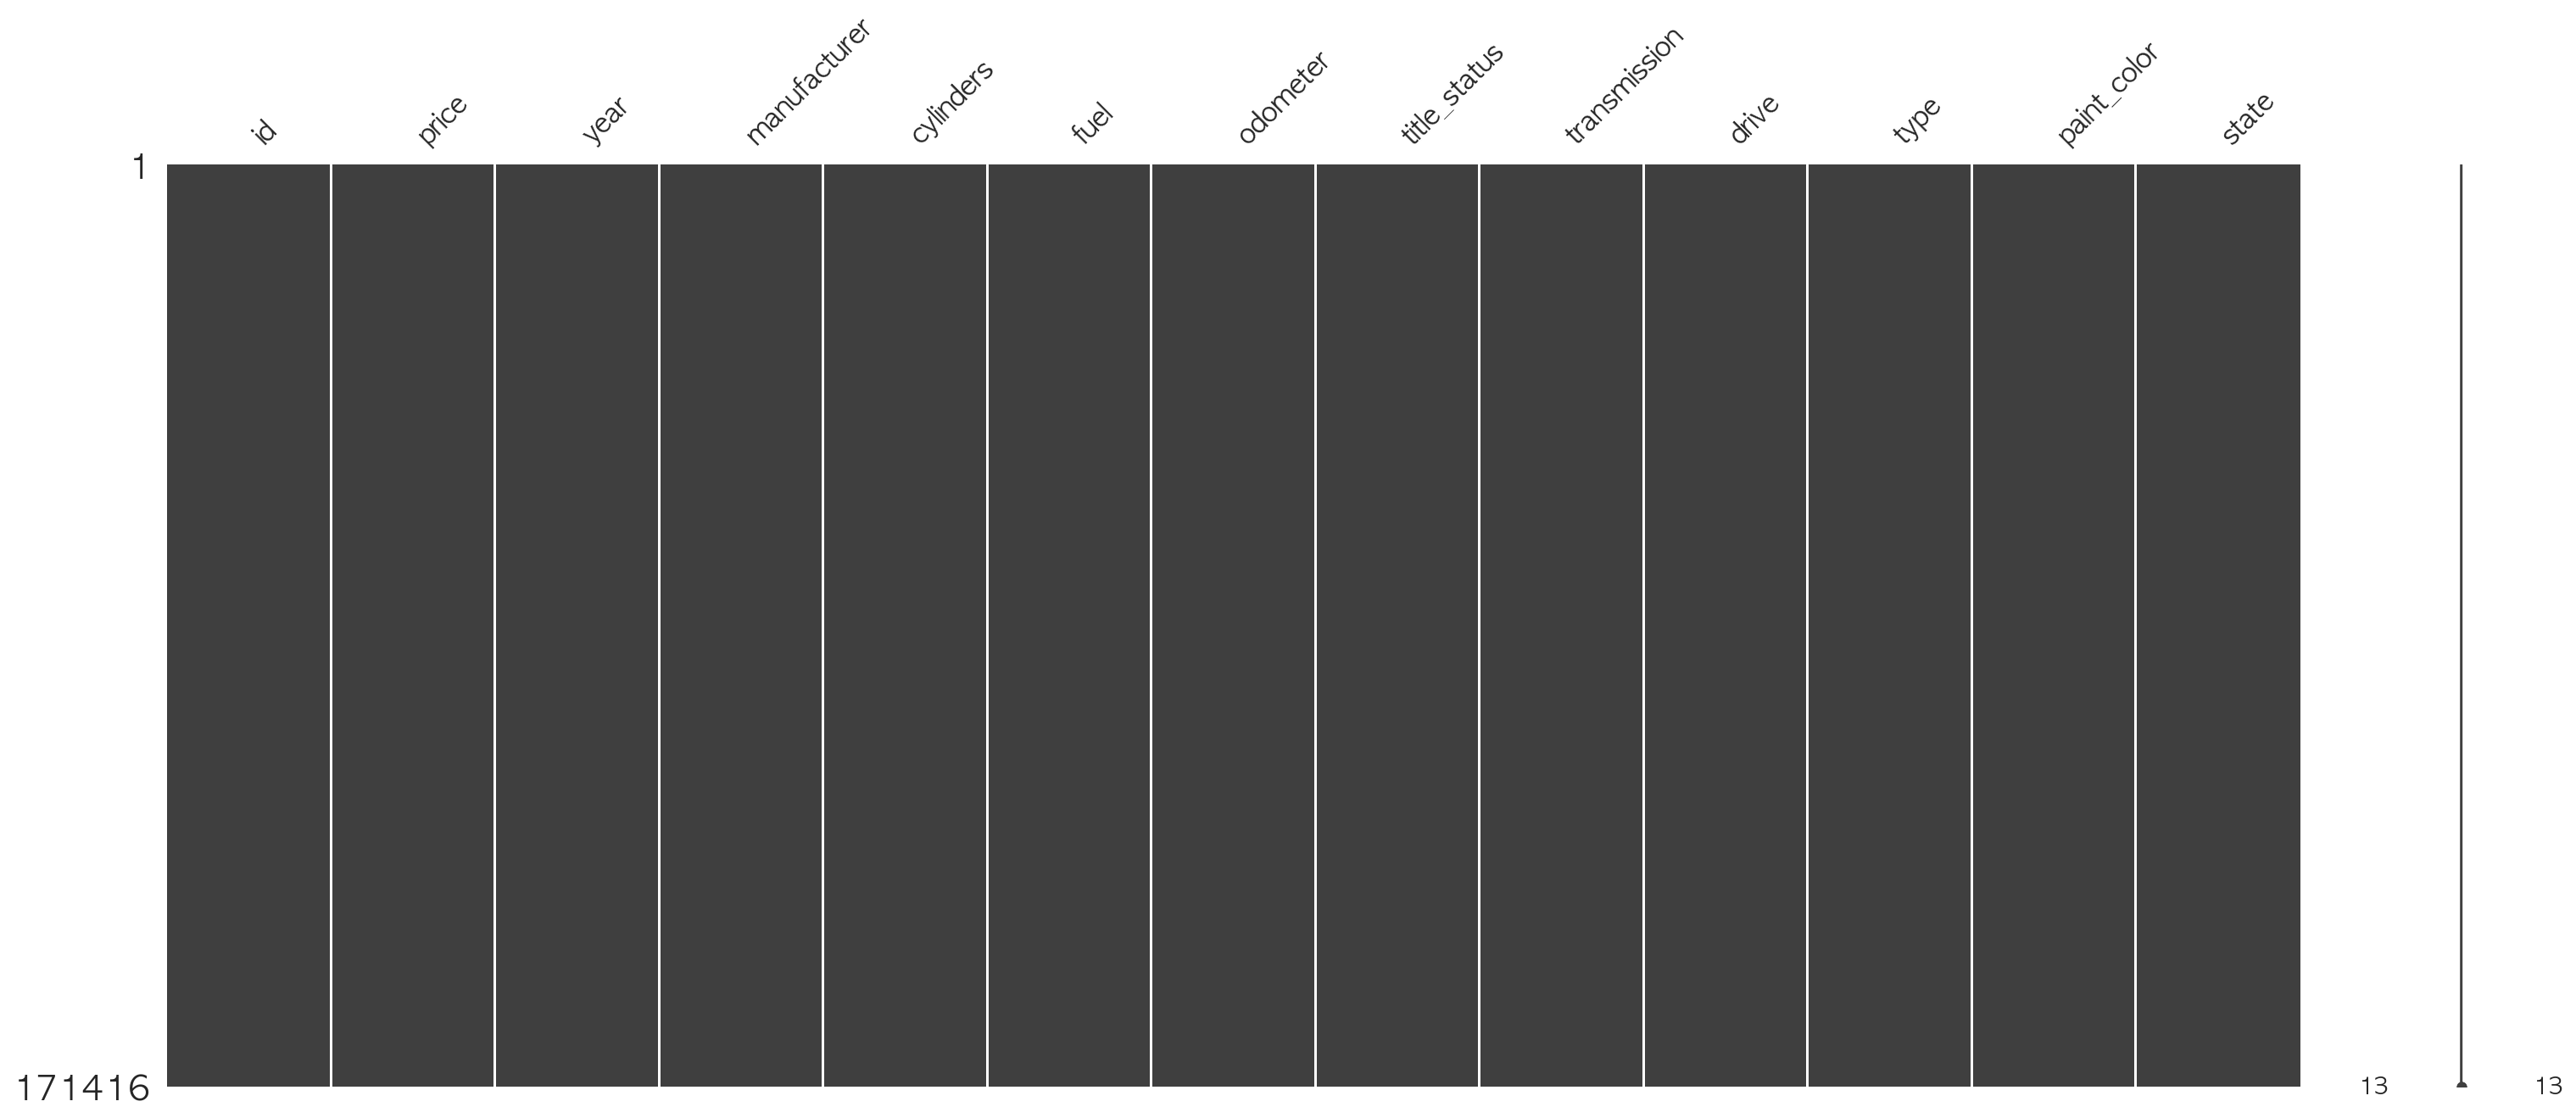

In [30]:
msno.matrix(raw_data_drop_row)
plt.show()

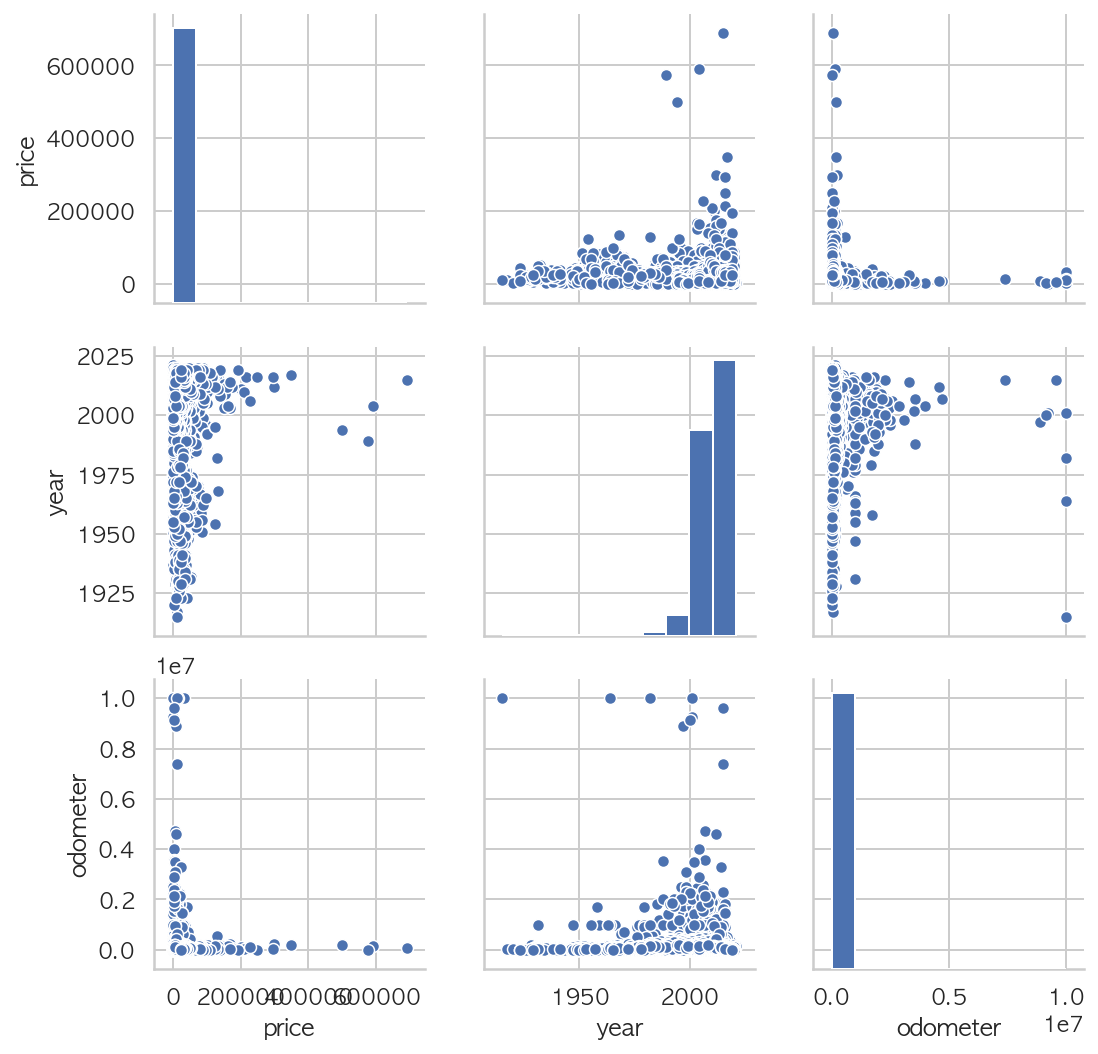

In [79]:
# 독립변수 실린더와 종속변수 가격과의 관계 확인
dfX = pd.DataFrame(raw_data_drop_row[['year', 'manufacturer', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']])
dfy = pd.DataFrame(raw_data_drop_row.price)
df = pd.concat([dfX, dfy], axis=1)
# df.tail()
sns.pairplot(df[['price', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']])
plt.show()

In [31]:
model = sm.OLS.from_formula("price ~ year + manufacturer + cylinders + fuel + odometer + title_status + transmission + drive + type + paint_color + state", data=raw_data_drop_row).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1098.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:59:00   Log-Likelihood:            -1.7838e+06
No. Observations:              171416   AIC:                         3.568e+06
Df Residuals:                  171278   BIC:                         3.569e+06
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [83]:
dfX.describe().loc['std']

year            7.29
odometer   108823.67
Name: std, dtype: float64

In [32]:
model = sm.OLS.from_formula("scale(price) ~ scale(year) + C(manufacturer) + C(cylinders) + C(fuel) + scale(odometer) + C(title_status) + C(transmission) + C(drive) + C(type) + C(paint_color) + C(state)", data=raw_data_drop_row).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           scale(price)   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1098.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:59:11   Log-Likelihood:            -1.8920e+05
No. Observations:              171416   AIC:                         3.787e+05
Df Residuals:                  171278   BIC:                         3.801e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [609]:
model = sm.OLS.from_formula("price ~ year", data=raw_data_drop_row).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                 3.249e+04
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:13:57   Log-Likelihood:            -1.8230e+06
No. Observations:              171416   AIC:                         3.646e+06
Df Residuals:                  171414   BIC:                         3.646e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.194e+06   6697.252   -178.268      0.0

In [33]:
model = sm.OLS.from_formula("scale(price) ~ scale(year) + scale(odometer) + C(state) * C(drive) + C(state) * C(fuel) + C(state) * C(manufacturer) + C(state) * C(cylinders)+ C(state) * C(title_status) + C(state) * C(transmission) + C(state) * C(type) + C(state) * C(paint_color)", raw_data_drop_row)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           scale(price)   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     45.68
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:05:03   Log-Likelihood:            -1.8285e+05
No. Observations:              171416   AIC:                         3.732e+05
Df Residuals:                  167661   BIC:                         4.109e+05
Df Model:                        3754                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [612]:
model = sm.OLS.from_formula('price ~ odometer', data = raw_data_drop_row).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:17:10   Log-Likelihood:            -1.8308e+06
No. Observations:              171416   AIC:                         3.662e+06
Df Residuals:                  171414   BIC:                         3.662e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.63e+04     36.005    452.635      0.0

In [606]:
result.predict({'x': [2021, 2022, 2023]})

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'year' is not defined
    price ~ year
            ^^^^

In [48]:
# 지역별 분포
raw_data['region'].describe()

count           509577
unique             403
top       fayetteville
freq              4501
Name: region, dtype: object

In [67]:
# raw_data['region'].value_counts()
# sns.distplot(raw_data[raw_data['region'].value_counts() > 1000]['region'])

fayetteville           4501
springfield            3955
rochester              3679
columbus               3453
jacksonville           3375
                       ... 
southwest MS             23
pierre / central SD      19
southwest TX              9
kansas city               5
st louis                  3
Name: region, Length: 403, dtype: int64

In [21]:
# region : 403개
# len(raw_data['region'].unique())
region_df = pd.DataFrame(raw_data['region'].value_counts())
region_df['지역'] = region_df.index
region_df.columns = ['지역별 등록대수', '지역명']
region_df = region_df.reset_index().drop('index', axis=1)
region_df

,지역별 등록대수,지역명
0,4501,fayetteville
1,3955,springfield
2,3679,rochester
3,3453,columbus
4,3375,jacksonville
...,...,...
398,23,southwest MS
399,19,pierre / central SD
400,9,southwest TX
401,5,kansas city


In [25]:
len(raw_data['region'].value_counts()[:10]) / len(raw_data['region'])

1.9624119612933863e-05

In [61]:
# 403개 지역중 상위 10위의 자동차 등록대수 : 총 34126개
# 403개 지역중 상위 100위의 자동차 등록대수 : 총 298060개
region_top10 = raw_data['region'].value_counts()[:10]
region_top10
# 지역별 

fayetteville       4501
springfield        3955
rochester          3679
columbus           3453
jacksonville       3375
richmond           3120
charleston         3071
modesto            2992
salem              2991
fresno / madera    2989
Name: region, dtype: int64

In [85]:
# 1000대 이상 등록 지역 : 182곳
region_over1000 = raw_data['region'].value_counts() > 1000
region_over1000.value_counts()

False    221
True     182
Name: region, dtype: int64

###### manufacturer 분석

In [ ]:
raw_data['manufacturer']

In [11]:
# 제조사별 등록 차량 수
manufacturer_df = pd.DataFrame(raw_data['manufacturer'].value_counts())
manufacturer_df['제조사'] = manufacturer_df.index
manufacturer_df.columns = ['차량수', '제조사']
manufacturer_df = manufacturer_df.reset_index().drop('index', axis=1)
manufacturer_df

,차량수,제조사
0,92601,ford
1,73661,chevrolet
2,38159,toyota
3,26435,nissan
4,26177,ram
5,25585,honda
6,23951,jeep
7,23126,gmc
8,19344,dodge
9,13468,bmw


In [13]:
raw_data[raw_data['manufacturer'] == 'morgan']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
267624,7048966097,https://boston.craigslist.org/gbs/ctd/d/rivers...,boston,https://boston.craigslist.org,49950,1972.00,morgan,aero 8,like new,8 cylinders,gas,38960.00,clean,other,000000000000R8285,rwd,mid-size,convertible,custom,https://images.craigslist.org/01010_aq8hEeRt5p...,"1972 Morgan Aero 8 Convertible - $49,950 Year...",nan,ma,41.79,-71.32
414817,7044935386,https://tulsa.craigslist.org/cto/d/tulsa-curta...,tulsa,https://tulsa.craigslist.org,3900,2017.00,morgan,NaN,like new,NaN,other,nan,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00909_3wATtrjebf...,Like new Morgan curtain side van box. Make an ...,nan,ok,36.09,-95.89
451303,7048967329,https://providence.craigslist.org/ctd/d/rivers...,rhode island,https://providence.craigslist.org,49950,1972.00,morgan,aero 8,like new,8 cylinders,gas,38960.00,clean,other,000000000000R8285,rwd,mid-size,convertible,custom,https://images.craigslist.org/01010_aq8hEeRt5p...,"1972 Morgan Aero 8 Convertible - $49,950 Year...",nan,ri,41.79,-71.32


###### year 분석

In [95]:
raw_data['year'].describe()

count   508050.00
mean      2009.66
std          8.57
min       1900.00
25%       2007.00
50%       2011.00
75%       2015.00
max       2021.00
Name: year, dtype: float64

In [136]:
# year 값 확인
raw_data['year'].value_counts()

2016.00    41171
2015.00    37311
2014.00    35626
2013.00    35106
2012.00    33493
           ...  
1915.00        1
1916.00        1
1921.00        1
1945.00        1
1919.00        1
Name: year, Length: 114, dtype: int64

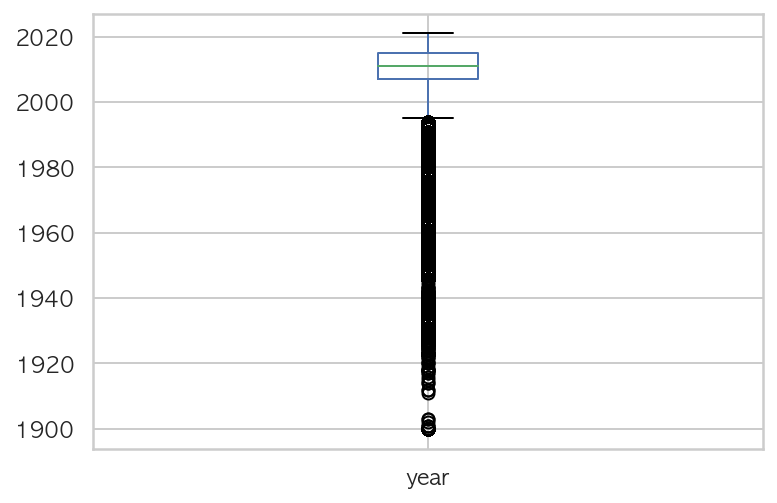

In [96]:
# year, drive 박스플롯
raw_data.boxplot('year')

In [138]:
raw_data['year'].isnull().sum()

1527

In [157]:
# 주행거리 10만 마일 이상 값 : 414개
raw_data[raw_data['odometer'] >= 1000000 ]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
686,7049955408,https://vermont.craigslist.org/cto/d/south-bar...,vermont,https://vermont.craigslist.org,2900,2008.00,mazda,6,excellent,4 cylinders,gas,1350000.00,clean,automatic,NaN,fwd,mid-size,sedan,grey,https://images.craigslist.org/00y0y_khgpa3Gngo...,Car just received a full tuneup and brand new ...,nan,vt,44.19,-72.49
1458,7046635620,https://vermont.craigslist.org/cto/d/hydeville...,vermont,https://vermont.craigslist.org,20000,2005.00,NaN,freightliner classic xl,good,6 cylinders,diesel,1300000.00,clean,manual,NaN,NaN,NaN,truck,NaN,https://images.craigslist.org/00H0H_9dPxBfbszV...,14 liter Detroit 18 speed 3:55 gears. 600000 o...,nan,vt,43.62,-73.27
5249,7047061923,https://fredericksburg.craigslist.org/cto/d/fr...,fredericksburg,https://fredericksburg.craigslist.org,6500,2013.00,ford,fusion,NaN,NaN,gas,1170000.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00L0L_8CZS2oNGhG...,"Hello all, I have for sale or trade a 2013 For...",nan,va,38.27,-77.55
5928,7040763518,https://fredericksburg.craigslist.org/cto/d/fr...,fredericksburg,https://fredericksburg.craigslist.org,5300,2008.00,subaru,outback 2.5i,good,4 cylinders,gas,1077500.00,clean,manual,NaN,4wd,NaN,wagon,blue,https://images.craigslist.org/00w0w_kkslzOug2g...,SELLING MY 2008 5 SPEED MANUAL TRANSMISSION OU...,nan,va,38.25,-77.47
7098,7039685010,https://harrisonburg.craigslist.org/cto/d/fish...,harrisonburg,https://harrisonburg.craigslist.org,1500,1997.00,ford,ranger,excellent,4 cylinders,gas,2500005.00,clean,manual,NaN,rwd,mid-size,pickup,grey,https://images.craigslist.org/00G0G_5lsoayaIq6...,97 ford ranger 2wd in excellent condition 5 sp...,nan,va,38.05,-78.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506040,7047379525,https://easttexas.craigslist.org/cto/d/gilmer-...,tyler / east TX,https://easttexas.craigslist.org,3370,2008.00,chevrolet,malibu lt,excellent,4 cylinders,gas,1888397.00,clean,manual,1G1ZJ57B184192583,fwd,full-size,other,grey,https://images.craigslist.org/00k0k_2fVUk1tbF7...,I have a 2008 Chevy Malibu and I have been hav...,nan,tx,32.70,-94.86
507267,7049082680,https://waco.craigslist.org/cto/d/bruceville-1...,waco,https://waco.craigslist.org,1000,1963.00,chevrolet,corvair/monza,fair,4 cylinders,gas,1000000.00,clean,manual,Na,rwd,compact,coupe,red,https://images.craigslist.org/00O0O_hIxm9Grvoe...,1963 Corvair/Monza 2dr.Hardtop: VERY RARE/Manu...,nan,tx,31.33,-97.23
507580,7044354109,https://waco.craigslist.org/cto/d/bruceville-1...,waco,https://waco.craigslist.org,1150,1963.00,chevrolet,corvair/monza,fair,4 cylinders,gas,1000000.00,clean,automatic,Na,rwd,compact,coupe,red,https://images.craigslist.org/01111_5eM6kkaOig...,1963 Corvair/Monza 900:2dr.Hardtop.Automatic T...,nan,tx,31.33,-97.23
507709,7040324046,https://waco.craigslist.org/cto/d/bruceville-2...,waco,https://waco.craigslist.org,500,2002.00,ford,e250,fair,8 cylinders,gas,1000000.00,clean,automatic,Na,rwd,full-size,van,white,https://images.craigslist.org/00h0h_awmh4qztqo...,Triton 5.4 Engine.Automatic Transmission.(ENGI...,nan,tx,31.33,-97.23


In [167]:
type(raw_data["year"][0])
raw_data['year'] = raw_data['year'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [150]:
raw_data['year'].value_counts()

2016.00    41171
2015.00    37311
2014.00    35626
2013.00    35106
2012.00    33493
           ...  
1915.00        1
1916.00        1
1921.00        1
1945.00        1
1919.00        1
Name: year, Length: 114, dtype: int64

###### odometer 분석

In [130]:
# odometer 값 확인
# raw_data[raw_data['odometer'] == 0] # 2268개
len(raw_data[raw_data['odometer'] <= 100]) # 445개
# raw_data[raw_data['odometer'] != 0].sort_values('odometer')[:2300]

4635

In [131]:
raw_data['odometer'].isnull().sum()

92324

In [576]:
# price under $100 count plot
# plt.figure(figsize=(10, 5))
x = raw_data_drop_row[raw_data_drop_row['price'] <= 100]
x 

,id,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
44342,7050020764,100,1998.00,jeep,8 cylinders,gas,100000.00,clean,automatic,4wd,pickup,custom,wi
91727,7049724981,100,1999.00,dodge,4 cylinders,gas,128000.00,clean,automatic,fwd,coupe,white,ca
411428,7046138666,100,2004.00,ford,8 cylinders,gas,135000.00,clean,automatic,rwd,SUV,red,ok
439948,7047280794,100,2011.00,hyundai,4 cylinders,gas,122684.00,clean,automatic,fwd,sedan,black,pa
440045,7045988063,100,2012.00,nissan,4 cylinders,gas,66459.00,clean,automatic,fwd,hatchback,blue,pa
440097,7045698466,100,2011.00,hyundai,4 cylinders,gas,122684.00,clean,automatic,fwd,sedan,black,pa
440159,7045019559,100,2011.00,hyundai,4 cylinders,gas,122684.00,clean,automatic,fwd,sedan,black,pa
440182,7044705566,100,2012.00,nissan,4 cylinders,gas,75515.00,clean,automatic,fwd,hatchback,blue,pa


In [579]:
sns.countplot(x=x, data=raw_data_drop_row)
plt.xticks(rotation=45)
plt.show()

ValueError: could not broadcast input array from shape (8,13) into shape (8)

In [67]:
# region : 403개
# raw_data['region'].unique()
raw_data['region'].value_counts()

fayetteville           4501
springfield            3955
rochester              3679
columbus               3453
jacksonville           3375
                       ... 
southwest MS             23
pierre / central SD      19
southwest TX              9
kansas city               5
st louis                  3
Name: region, Length: 403, dtype: int64

In [161]:
# model의 빈도수 확인
raw_data['model'].value_counts()

f-150                      11341
silverado 1500              7405
1500                        7367
silverado                   5256
2500                        4439
                           ...  
acardia                        1
sierra 1500 ext cab 4x4        1
sierra denali awd              1
tundra 4x4 db sr5              1
versa 1.8s hatchback           1
Name: model, Length: 35852, dtype: int64

##### model 빈도수 시각화

In [203]:
# 전체 모델의 수
len(raw_data['model'].value_counts())
raw_data['model'].value_counts()

pandas.core.series.Series

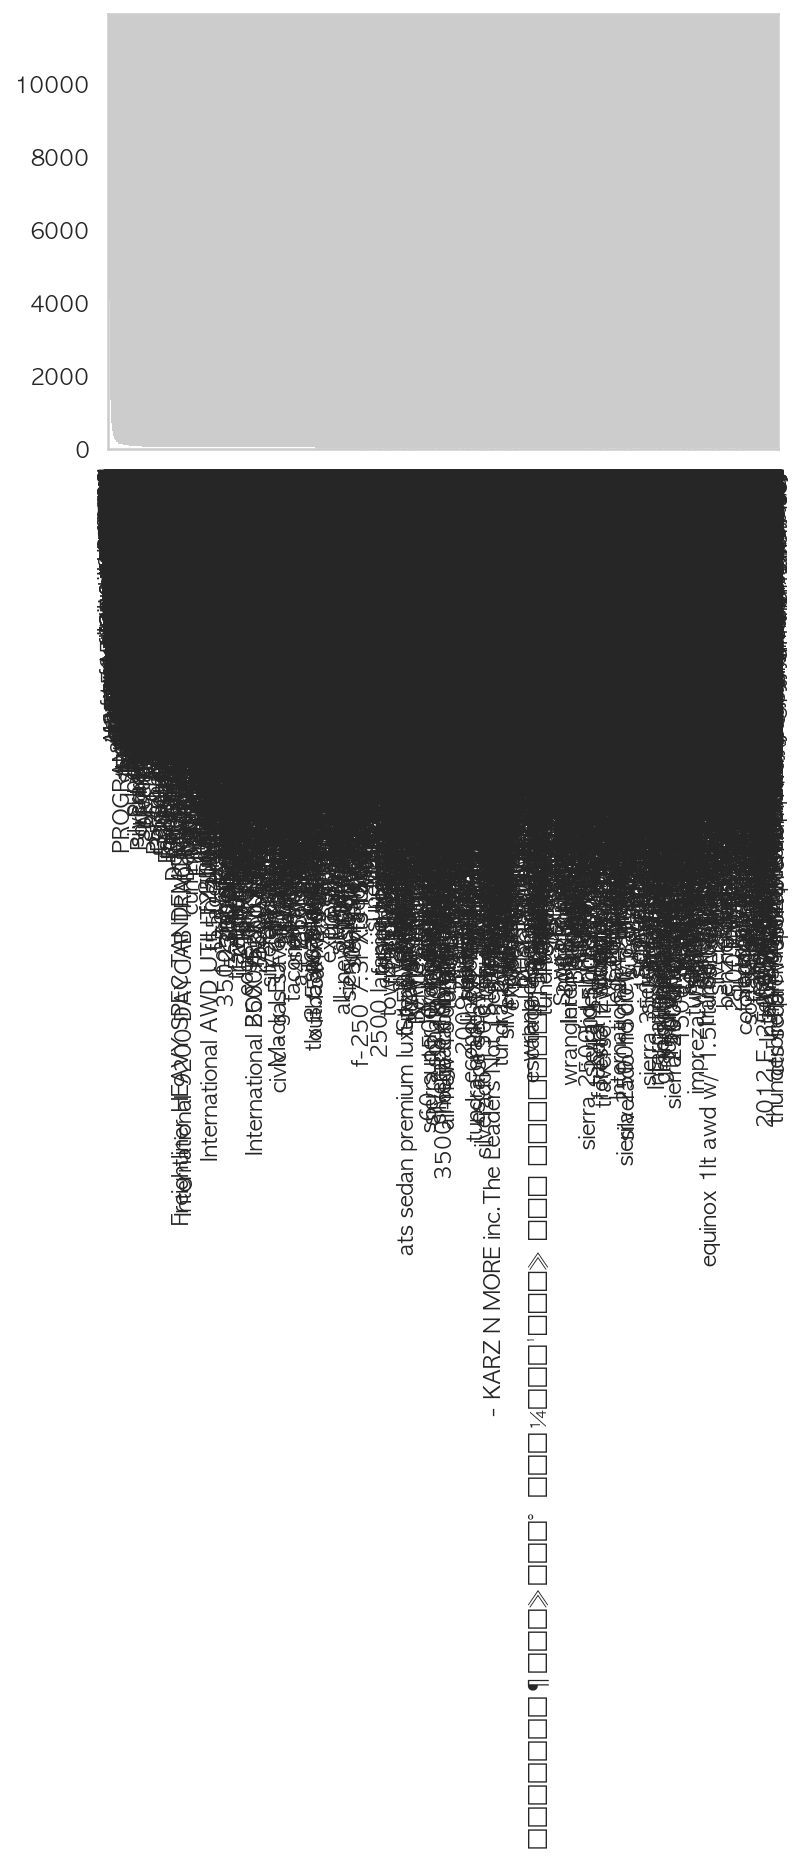

In [206]:
raw_data['model'].value_counts().plot.bar();

In [207]:
raw_data['model'].mode()

0    f-150
dtype: object

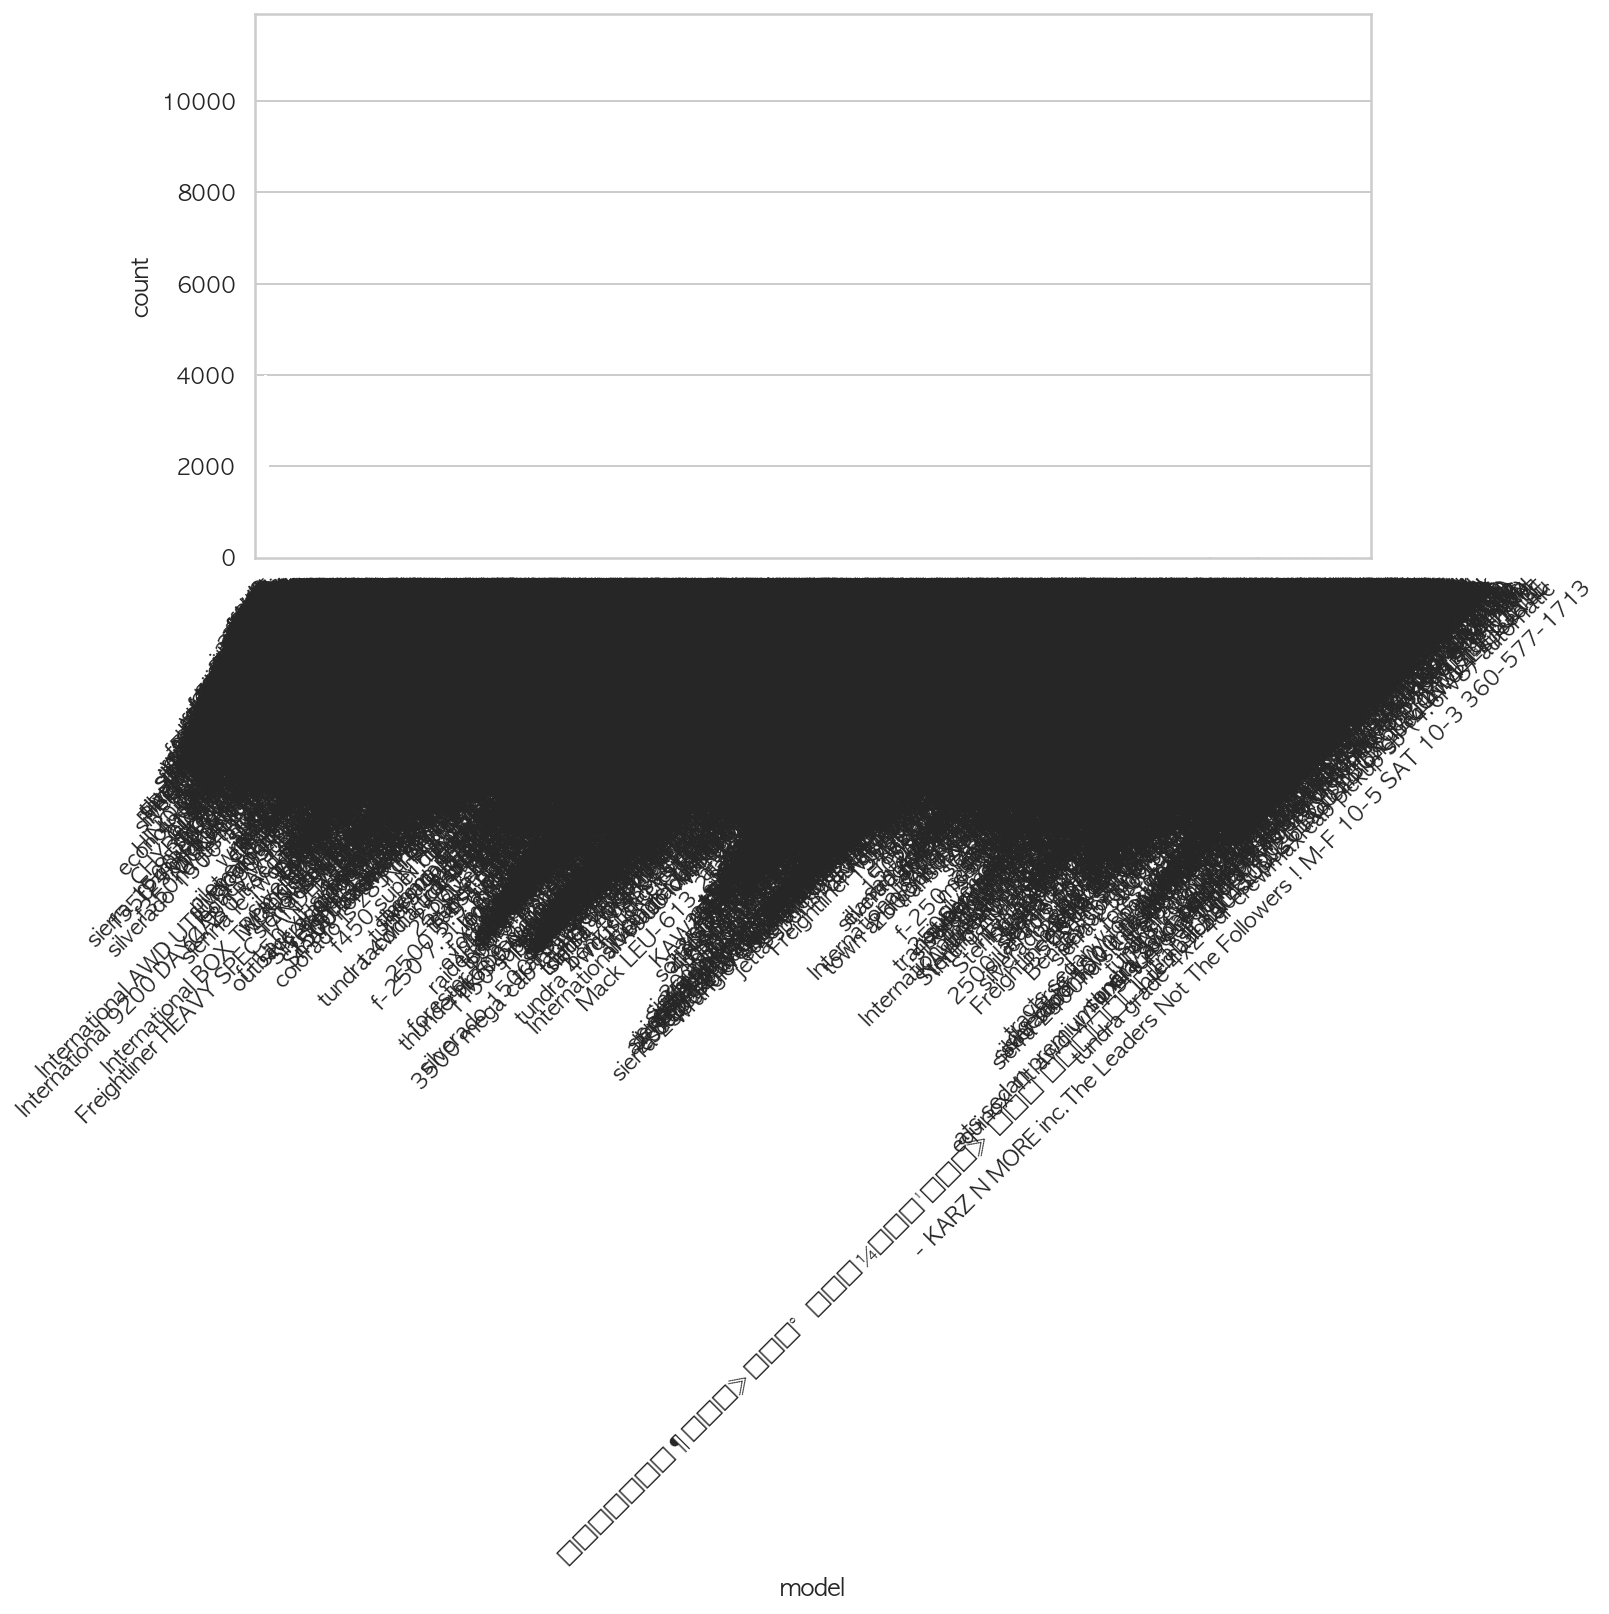

In [3]:
# model count plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='model', data=raw_data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 상관분석
plt.scatter(raw_data[''])

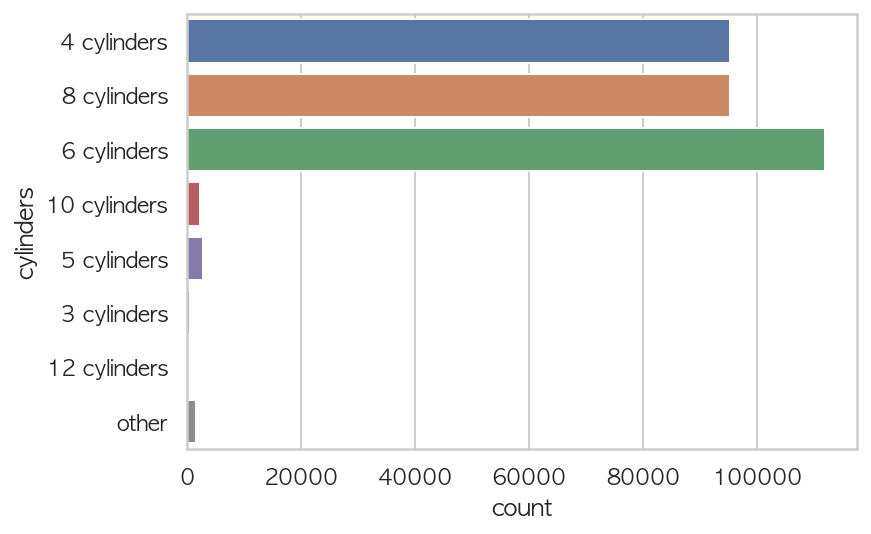

In [3]:
# cylinder countplot
sns.countplot(y='cylinders', data=raw_data)

In [11]:
# 제조사별 등록 차량 수
manufacturer_df = pd.DataFrame(raw_data['manufacturer'].value_counts())
manufacturer_df['제조사'] = manufacturer_df.index
manufacturer_df.columns = ['차량수', '제조사']
manufacturer_df = manufacturer_df.reset_index().drop('index', axis=1)
manufacturer_df

,차량수,제조사
0,92601,ford
1,73661,chevrolet
2,38159,toyota
3,26435,nissan
4,26177,ram
5,25585,honda
6,23951,jeep
7,23126,gmc
8,19344,dodge
9,13468,bmw


In [13]:
raw_data[raw_data['manufacturer'] == 'morgan']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
267624,7048966097,https://boston.craigslist.org/gbs/ctd/d/rivers...,boston,https://boston.craigslist.org,49950,1972.00,morgan,aero 8,like new,8 cylinders,gas,38960.00,clean,other,000000000000R8285,rwd,mid-size,convertible,custom,https://images.craigslist.org/01010_aq8hEeRt5p...,"1972 Morgan Aero 8 Convertible - $49,950 Year...",nan,ma,41.79,-71.32
414817,7044935386,https://tulsa.craigslist.org/cto/d/tulsa-curta...,tulsa,https://tulsa.craigslist.org,3900,2017.00,morgan,NaN,like new,NaN,other,nan,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00909_3wATtrjebf...,Like new Morgan curtain side van box. Make an ...,nan,ok,36.09,-95.89
451303,7048967329,https://providence.craigslist.org/ctd/d/rivers...,rhode island,https://providence.craigslist.org,49950,1972.00,morgan,aero 8,like new,8 cylinders,gas,38960.00,clean,other,000000000000R8285,rwd,mid-size,convertible,custom,https://images.craigslist.org/01010_aq8hEeRt5p...,"1972 Morgan Aero 8 Convertible - $49,950 Year...",nan,ri,41.79,-71.32


In [ ]:
model = sm.OLS.from_formula("scale(price) ~ scale(year) + scale(odometer) + C(state) * C(drive) + C(state) * C(fuel) + C(state) * C(manufacturer) + C(state) * C(cylinders)+ C(state) * C(title_status) + C(state) * C(transmission) + C(state) * C(type) + C(state) * C(paint_color)",df)
result = model.fit()
print(result.summary())